# A. INTRODUCTION

1. Balance

* BALANCE: Balance amount left in their account to make purchases (
* BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
2. Purchases

* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES: Amount of purchase done in installment
3. Purchases Frequency

* PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* PURCHASESTRX: Number of purchase transactions made
4. Cash Advance

* CASHADVANCE: Cash in advance given by the user
* CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
* CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
5. Payments

* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user
* PRCFULLPAYMENT: Percent of full payment paid by user
6. Others

* CUSTID: Identification of Credit Card holder (Categorical)
* CREDITLIMIT: Limit of Credit Card for user
* TENURE: Tenure of credit card service for user

# B. IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# C. DATA LOADING

In [2]:
df = pd.read_csv('CC GENERAL.csv')

df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# D. DATA CLEANING

## Eksplorasi dataset sederhana 

In [3]:
# melihat info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

keseluruhan data memilki dtype numerik hanya pada kolom CUST_ID saja yang memiliki dtype object

In [4]:
# melihat shape dataset
df.shape

(8950, 18)

datset memiliki 8950 rows dan 18 columns

In [5]:
# melihat describe dari dataset
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

dataset ini menunjukkan variasi besar dalam perilaku pengguna kartu kredit dalam hal pembelian, pembayaran, dan pengelolaan saldo. Beberapa pelanggan melakukan pembelian besar, penarikan tunai, dan memiliki batas kredit yang tinggi, sementara yang lain mungkin tidak aktif dalam penggunaan kartu kredit mereka.

## Mengecilkan nama kolom

In [6]:

new_cols_names = [] 

for col in df.columns:
    new_cols_names.append(col.lower())


df.columns = new_cols_names

df.head(1)

cust_id    balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001  40.900749           0.818182       95.4               0.0   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4           0.0             0.166667   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                         0.0                          0.083333   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                     0.0                 0              2        1000.0   

     payments  minimum_payments  prc_full_payment  tenure  
0  201.802084        139.509787               0.0      12

In [7]:
# drop kolom cust_id
df = df.drop(columns='cust_id')

In [8]:
# melihat duplicated data
df.duplicated().sum()

0

## Mengatasi Missing Values

In [9]:
# melihat missing values
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [10]:
# imputasi kolom yang memiliki missing values 

# mengisi missing values di kolom minimum-payments menggunakan mean 
df.loc[(df['minimum_payments'].isnull() == True), 'minimum_payments'] = df['minimum_payments'].mean()

# mengisi missing valus di kolom credit_limit menggunakan mean  
df.loc[(df['credit_limit'].isnull() == True), 'credit_limit'] = df['credit_limit'].mean()

In [11]:
# cek missing values lagi 
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## Mengatasi Outlier

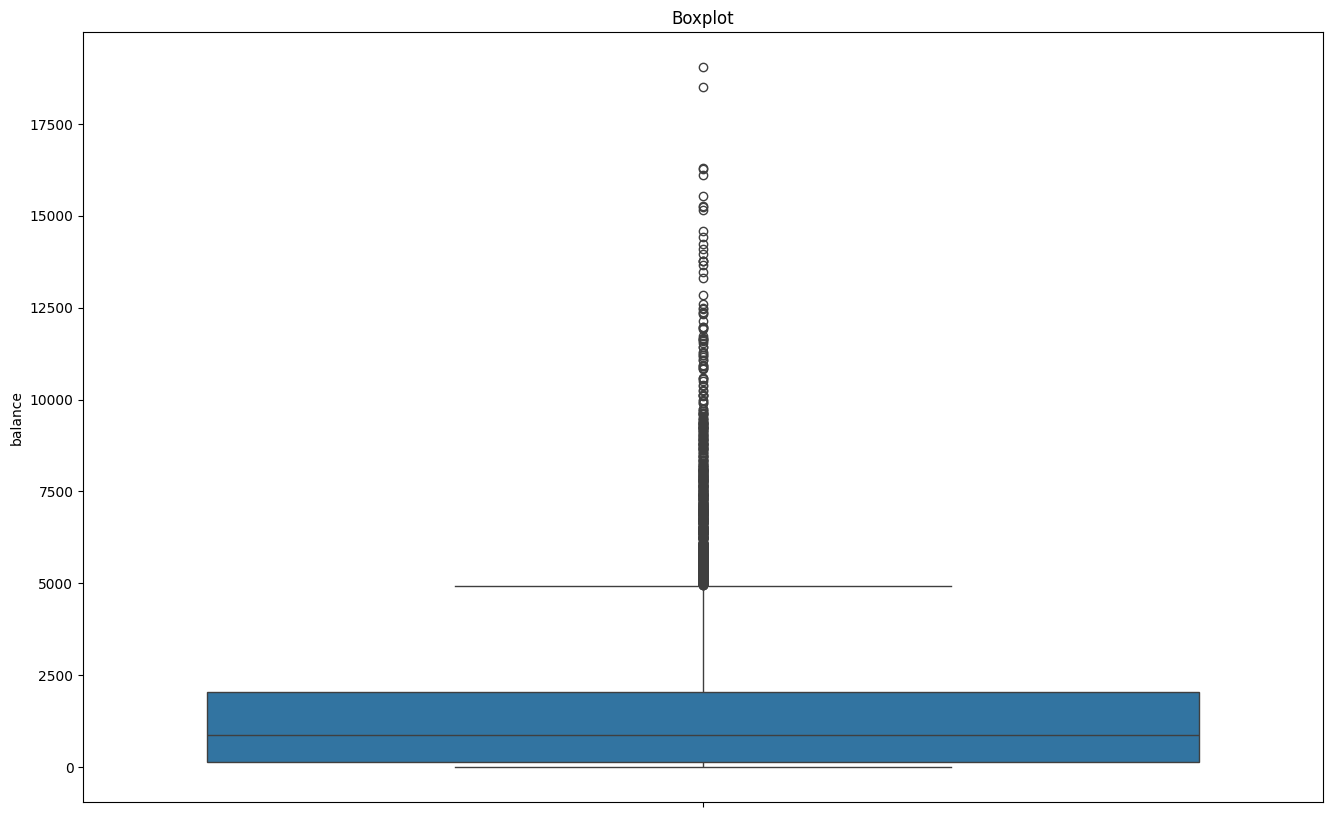

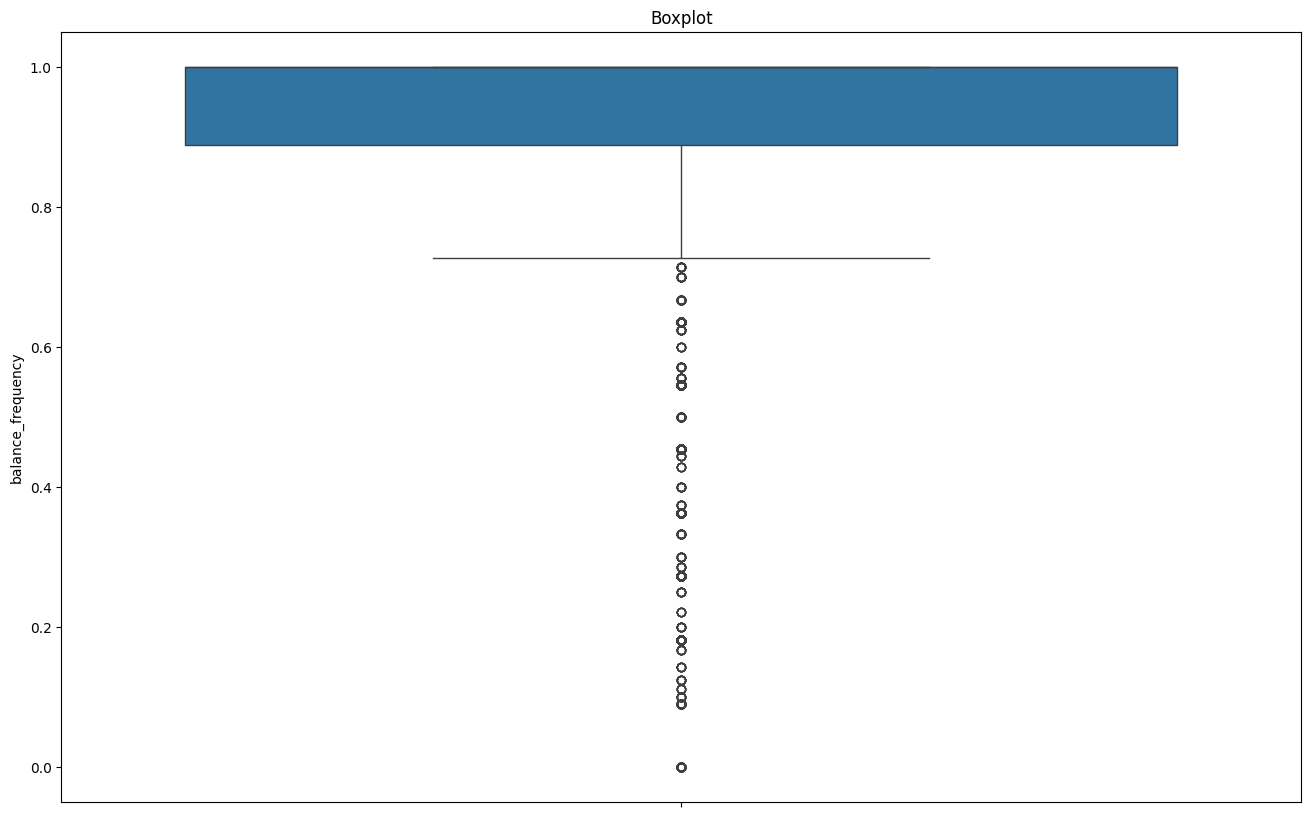

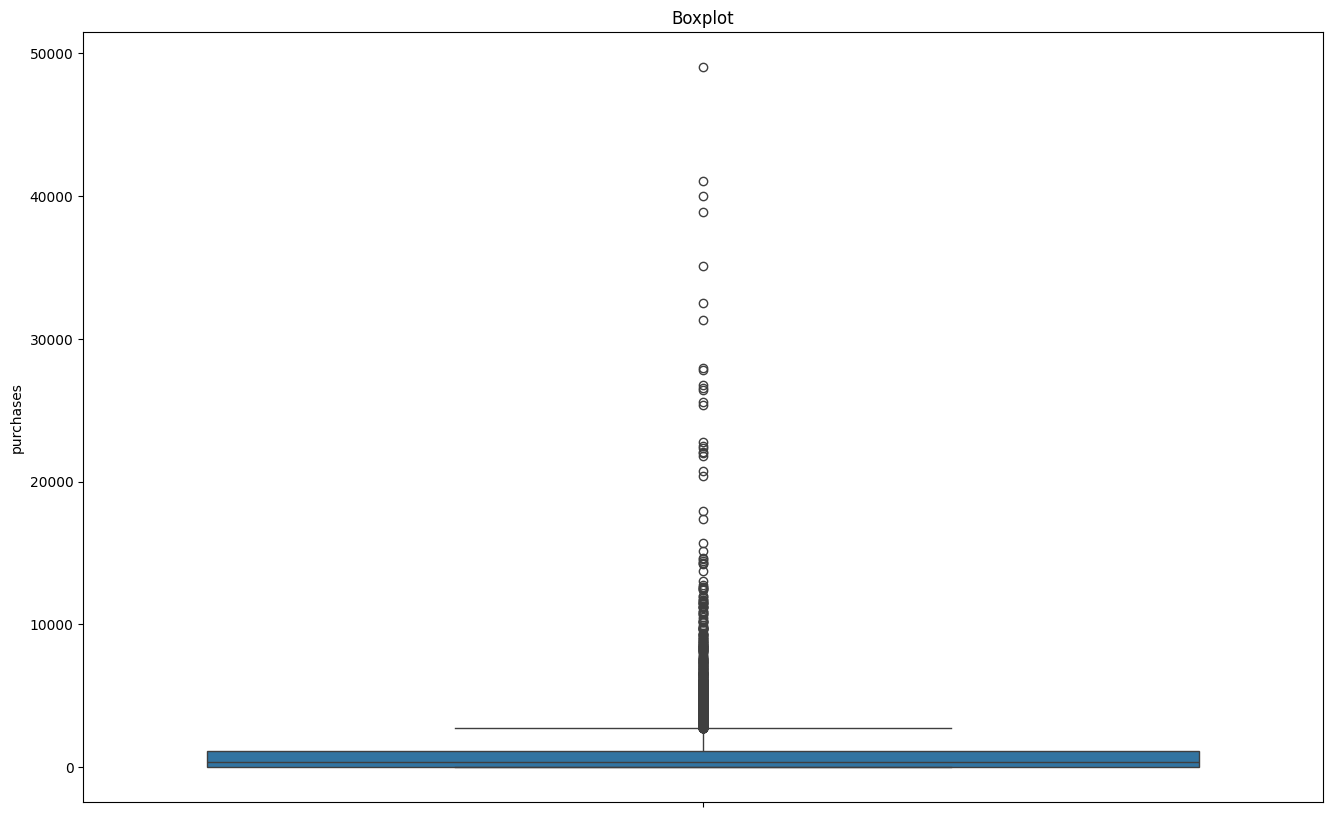

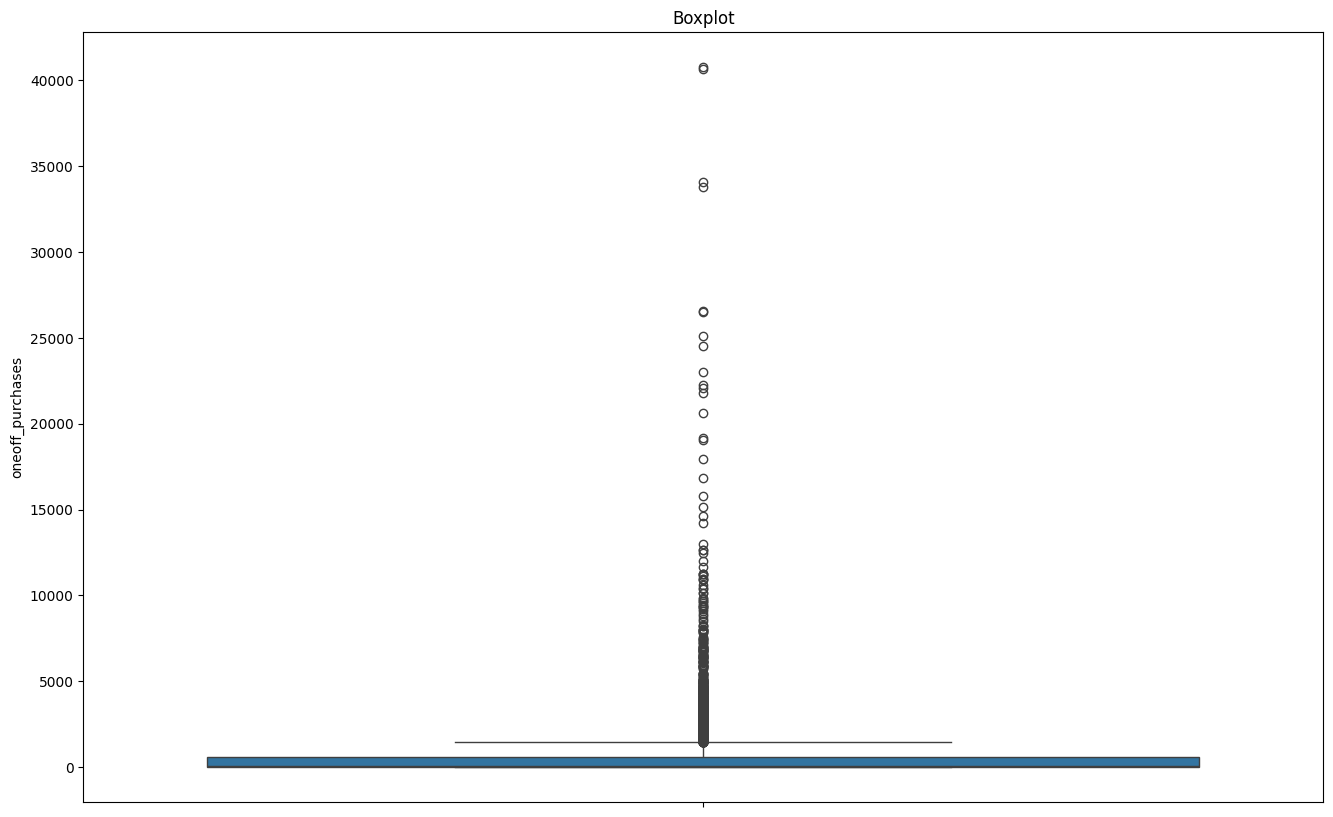

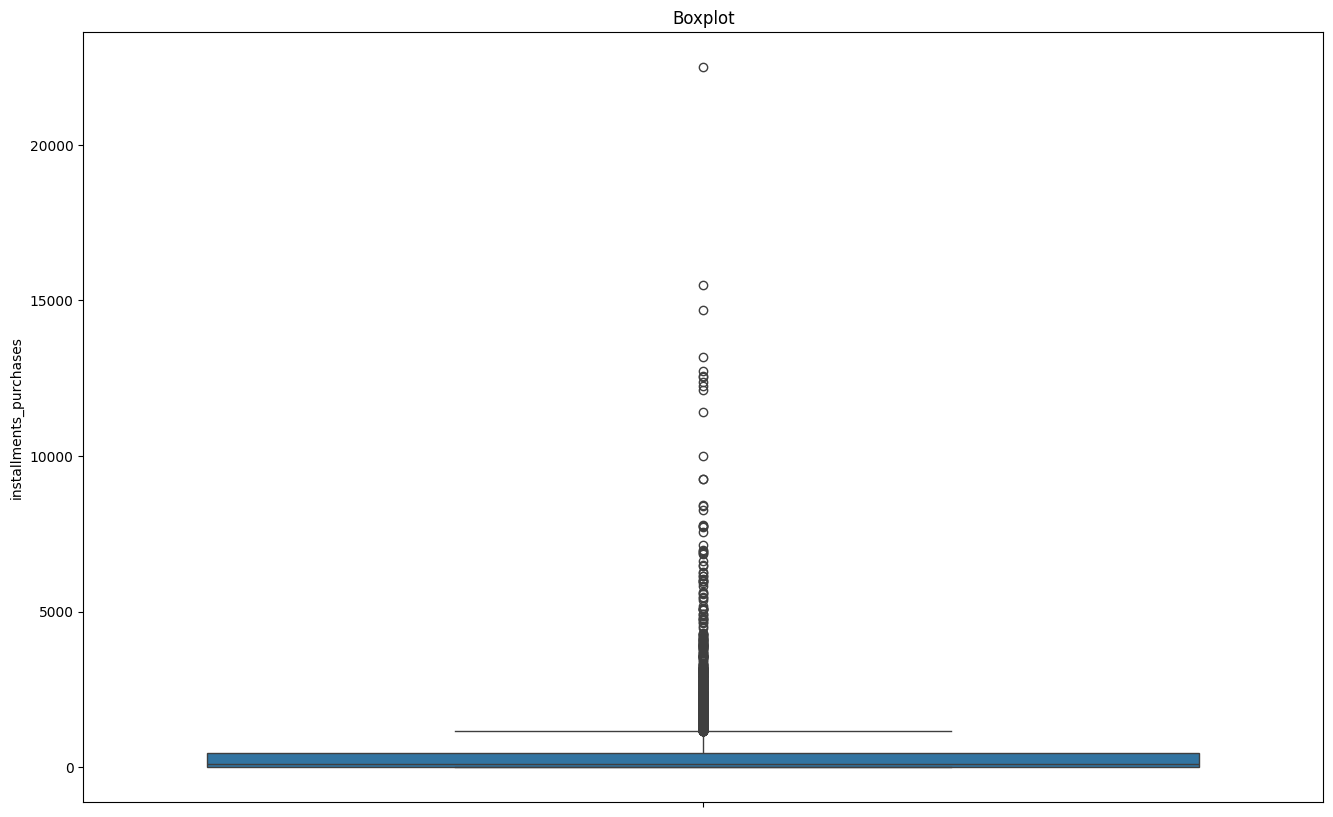

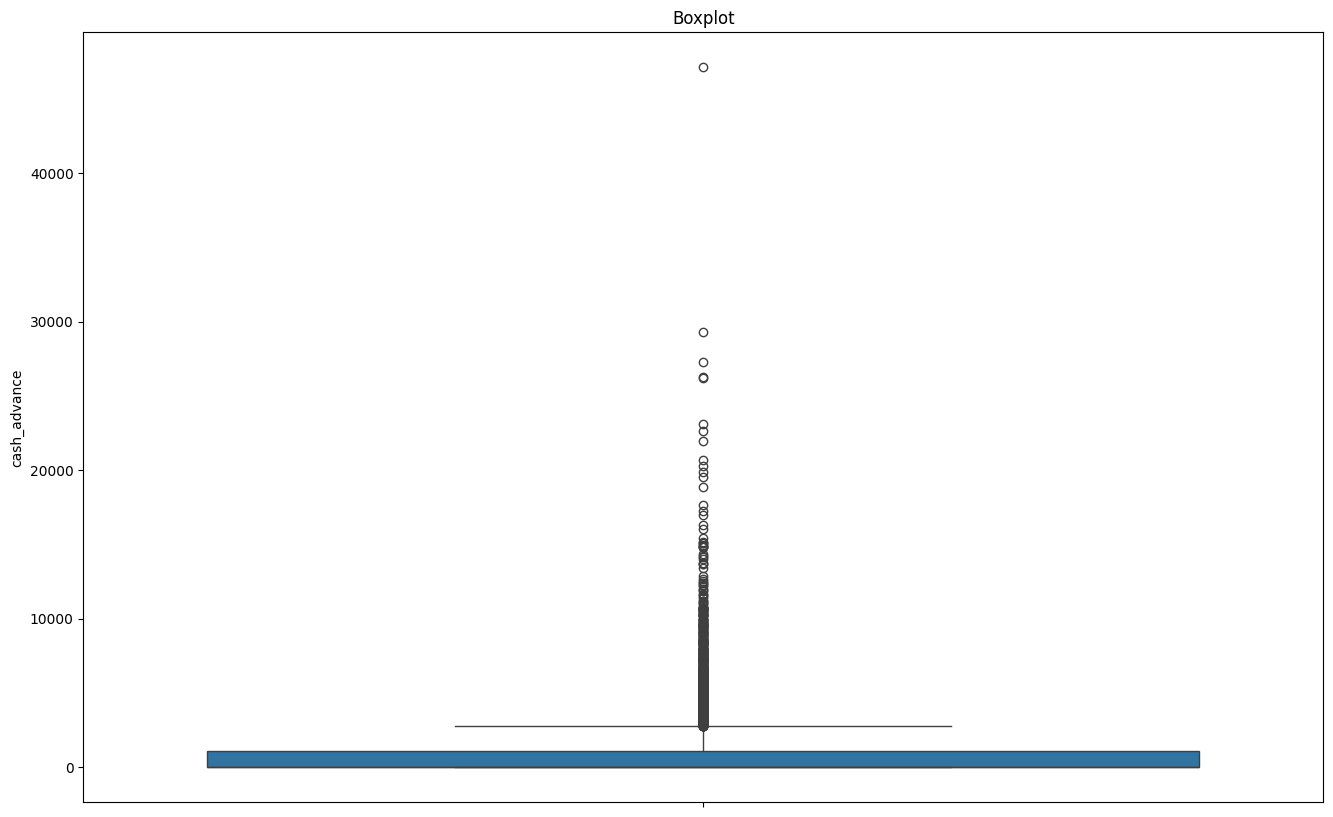

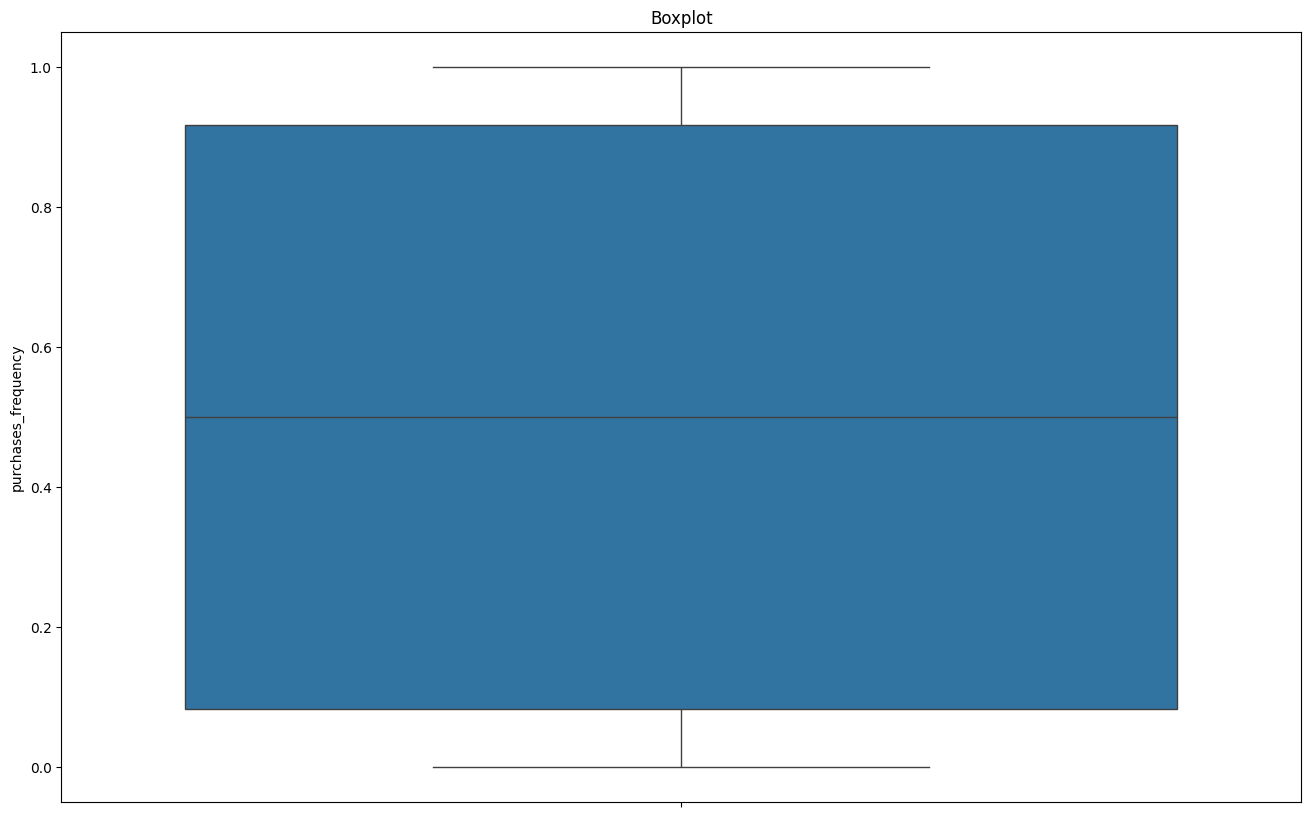

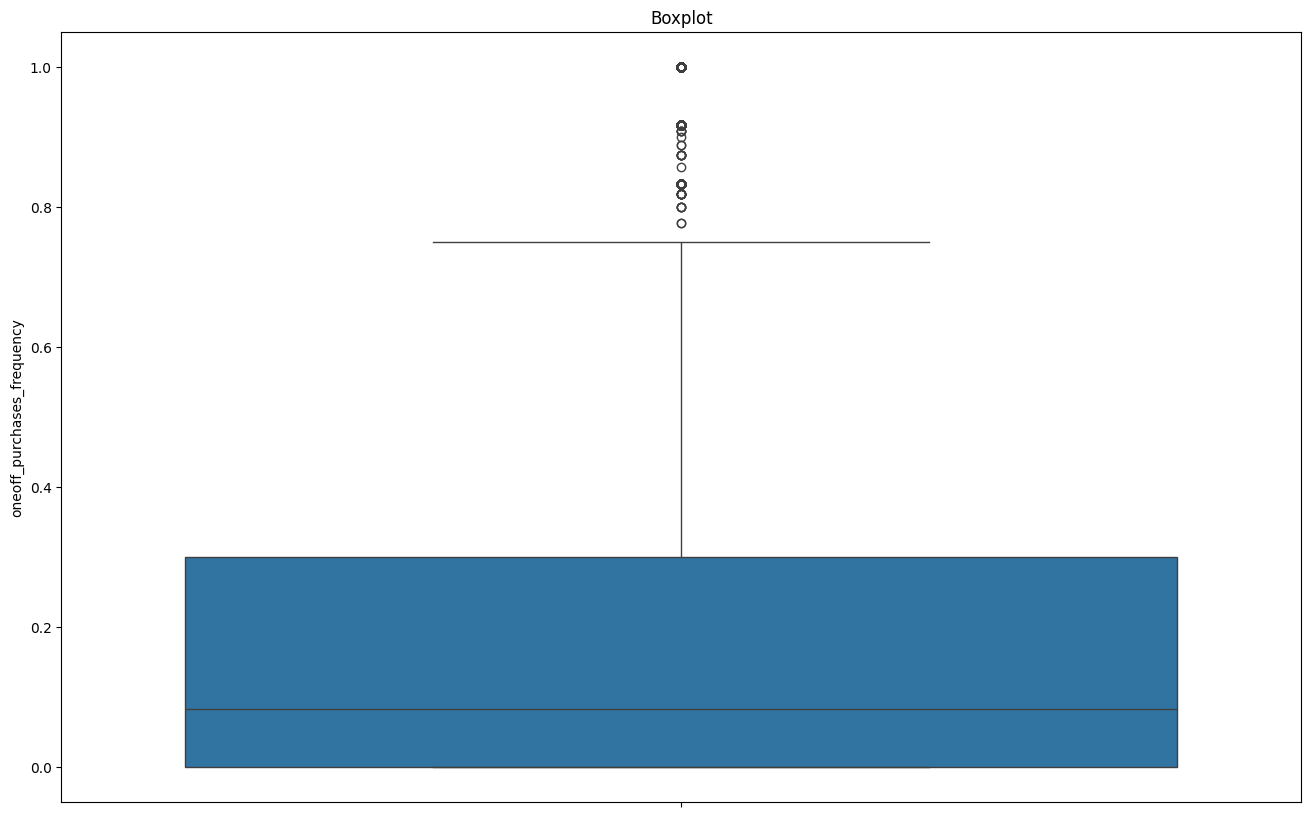

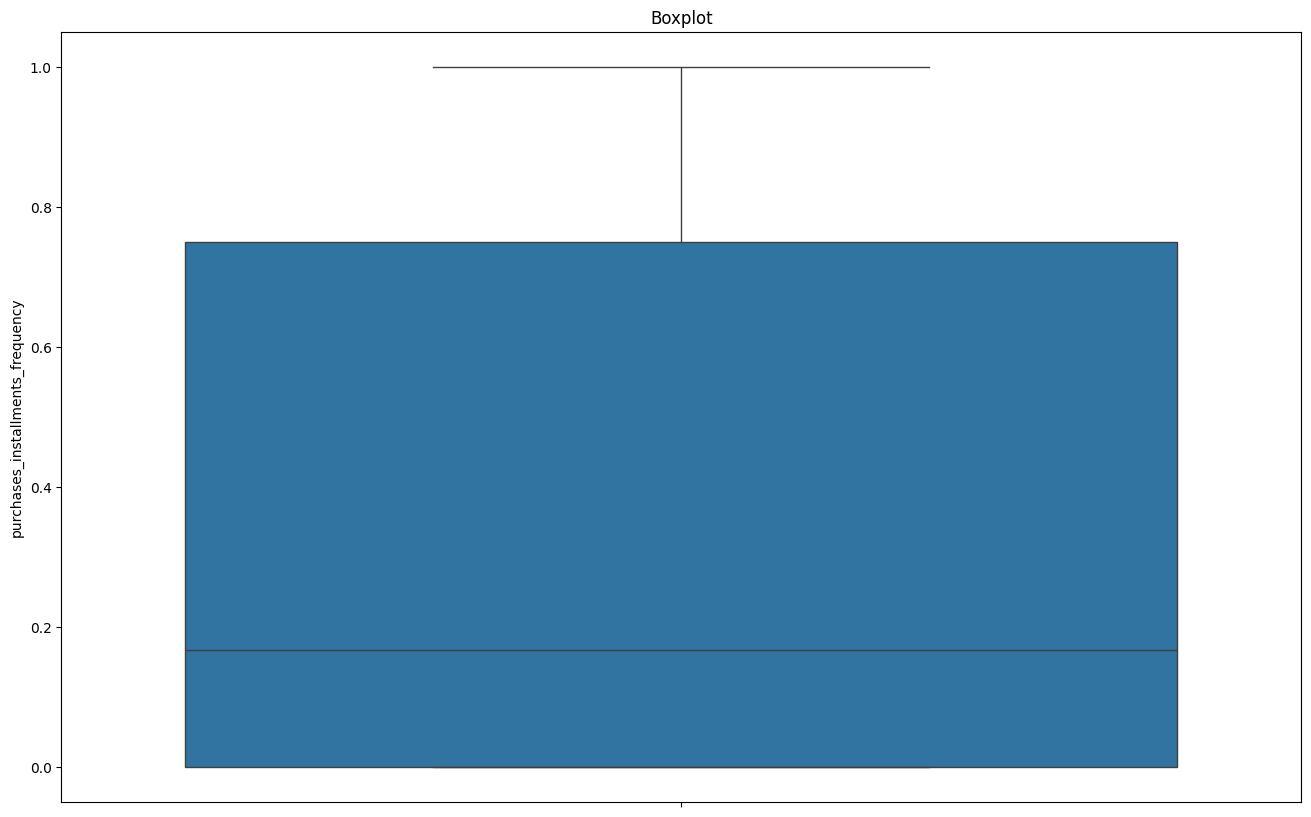

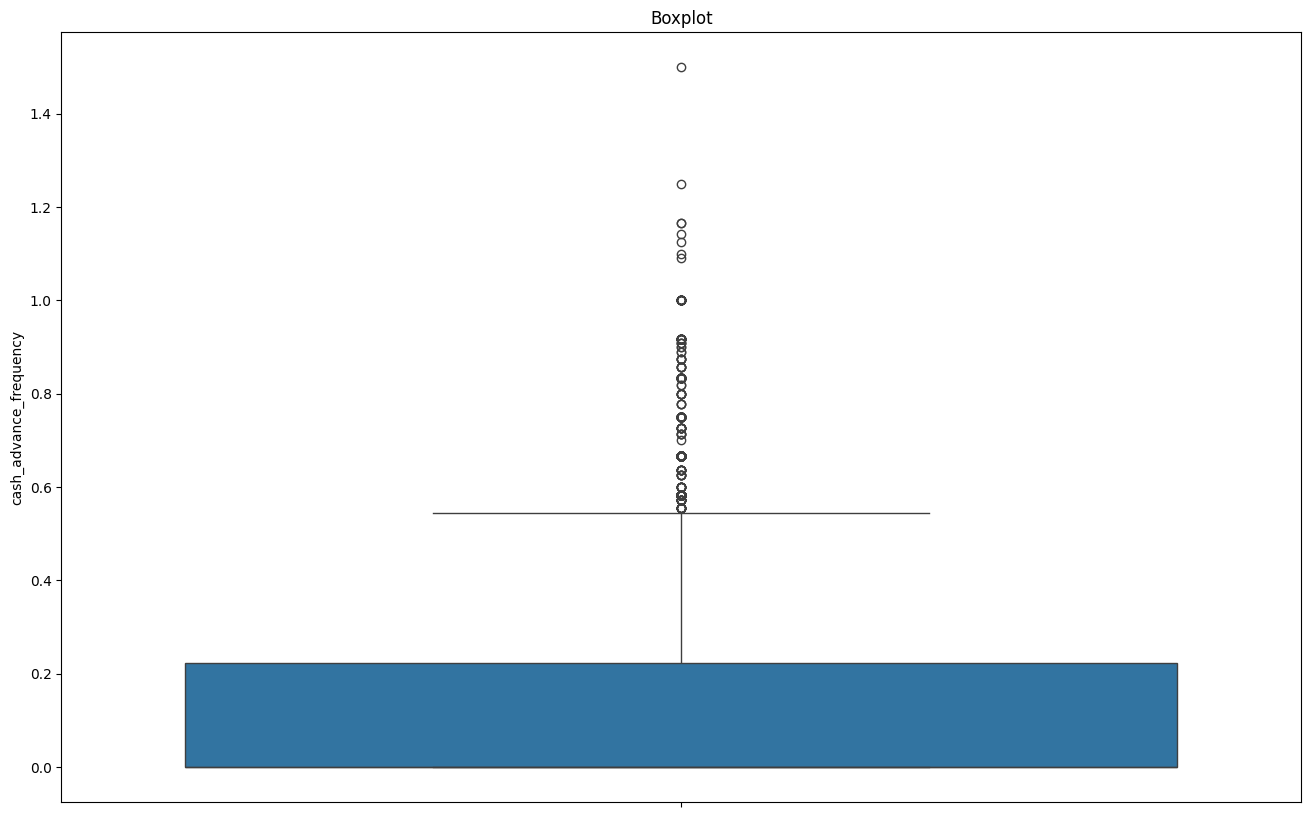

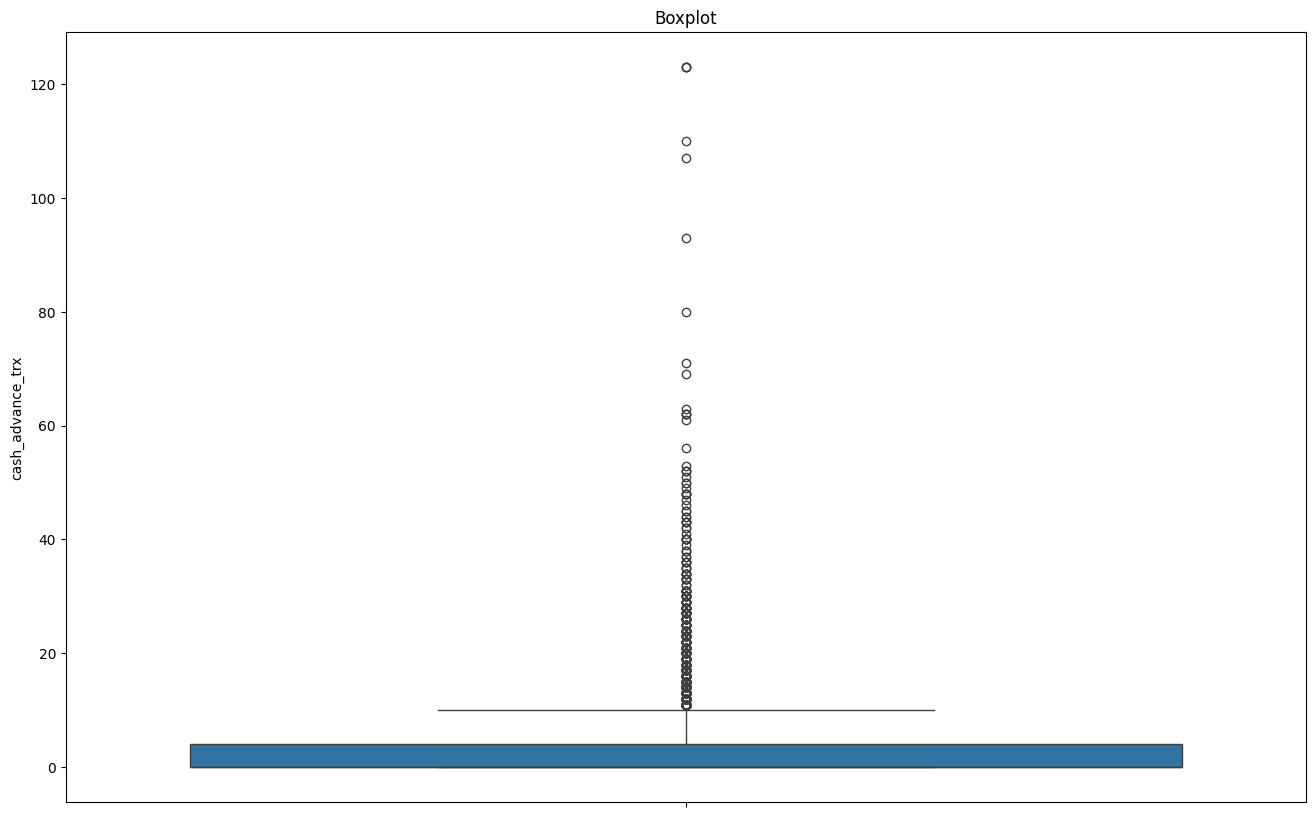

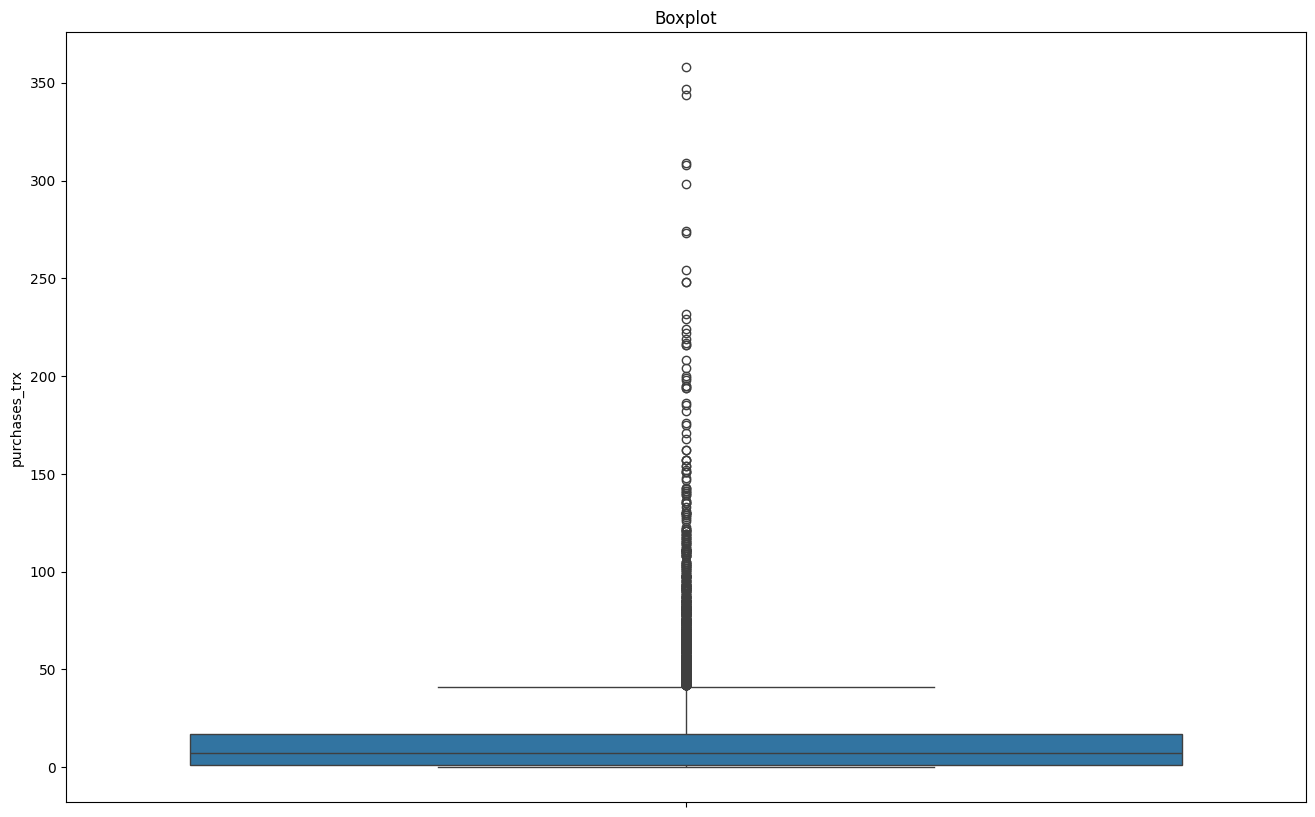

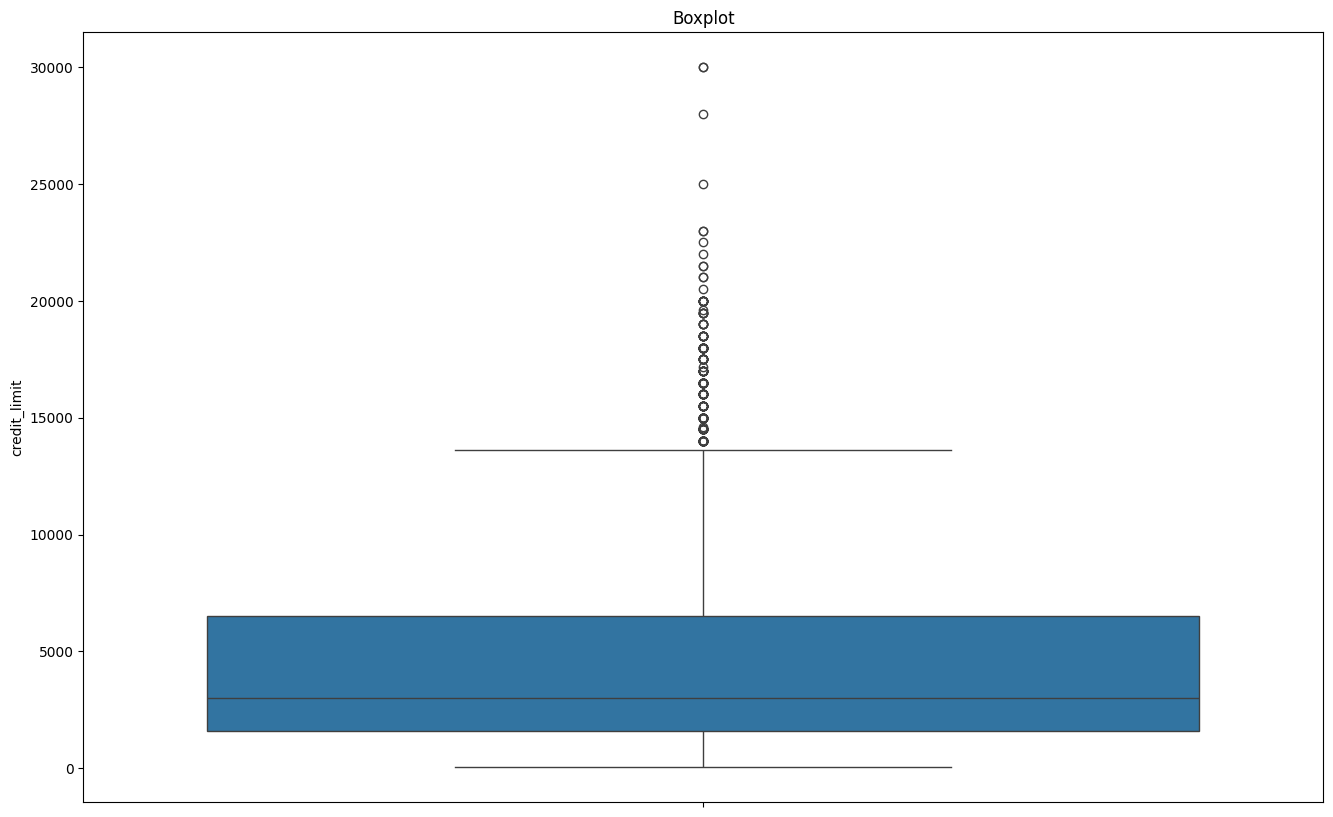

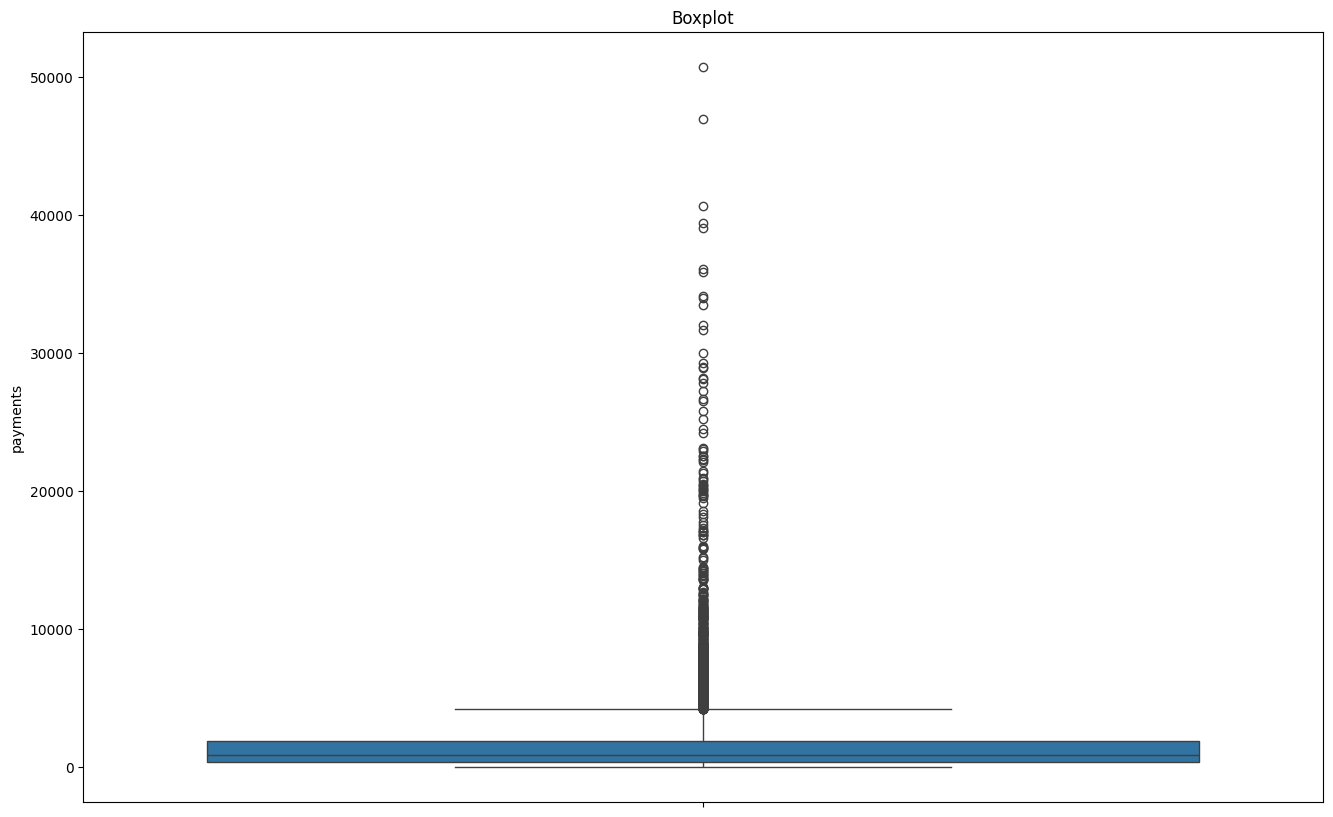

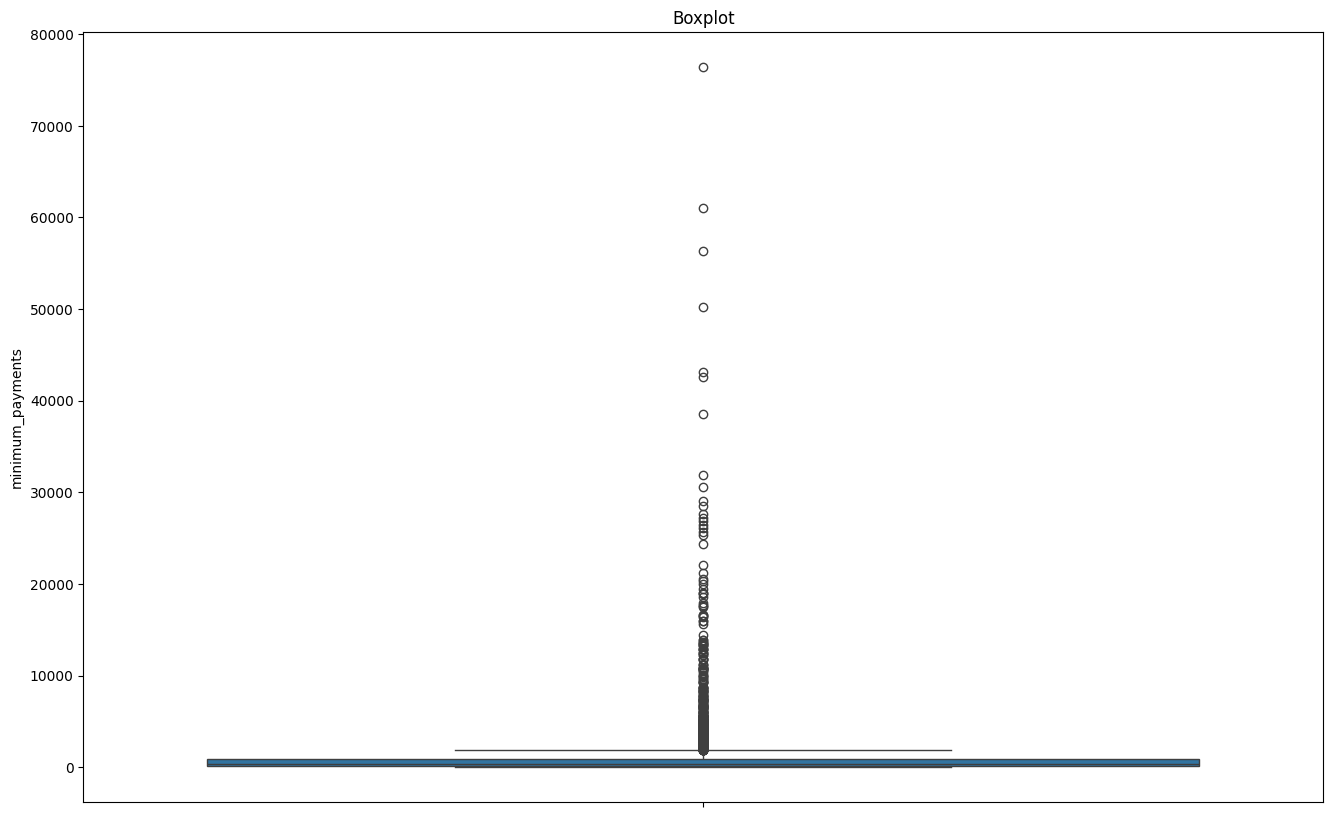

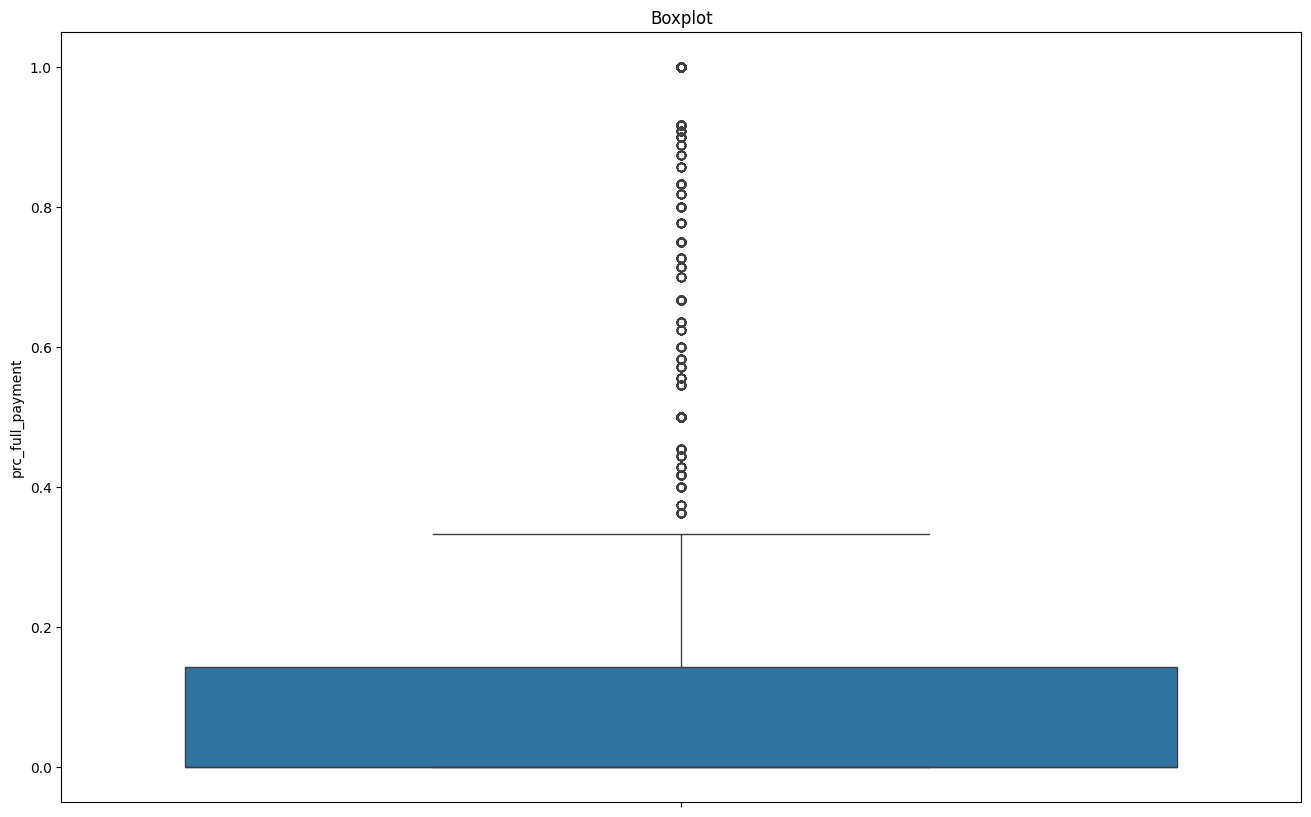

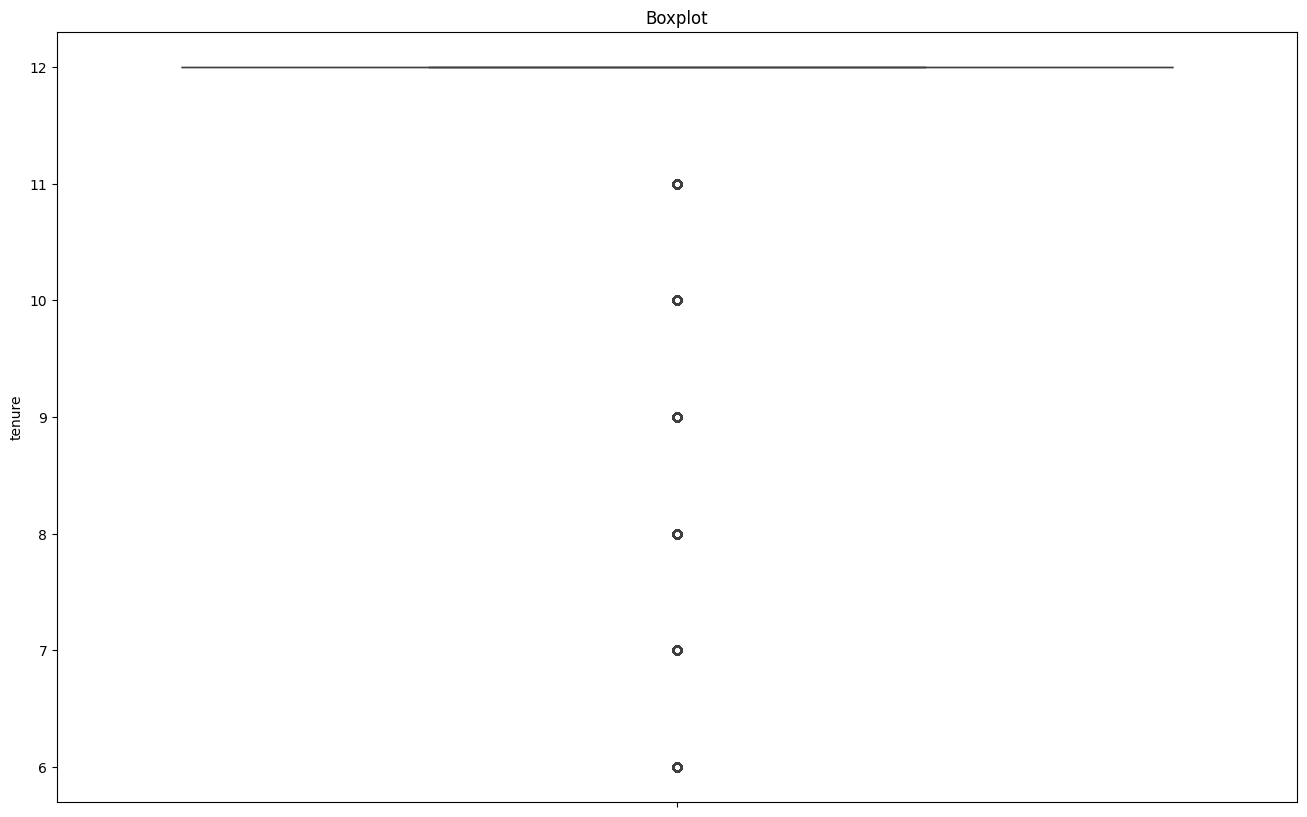

In [12]:
# melihat setiap kolom untuk mencari outlier menggunakan boxplot dan histogram

for col in df.columns:
  plt.figure(figsize=(16,10))
  sns.boxplot(df[col])
  plt.title('Boxplot')

  plt.show()

In [13]:
# handling outlier
for cols in df.columns:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    df.loc[df[cols] < lower_boundary,cols] = lower_boundary
    df.loc[df[cols] > upper_boundary,cols] = upper_boundary

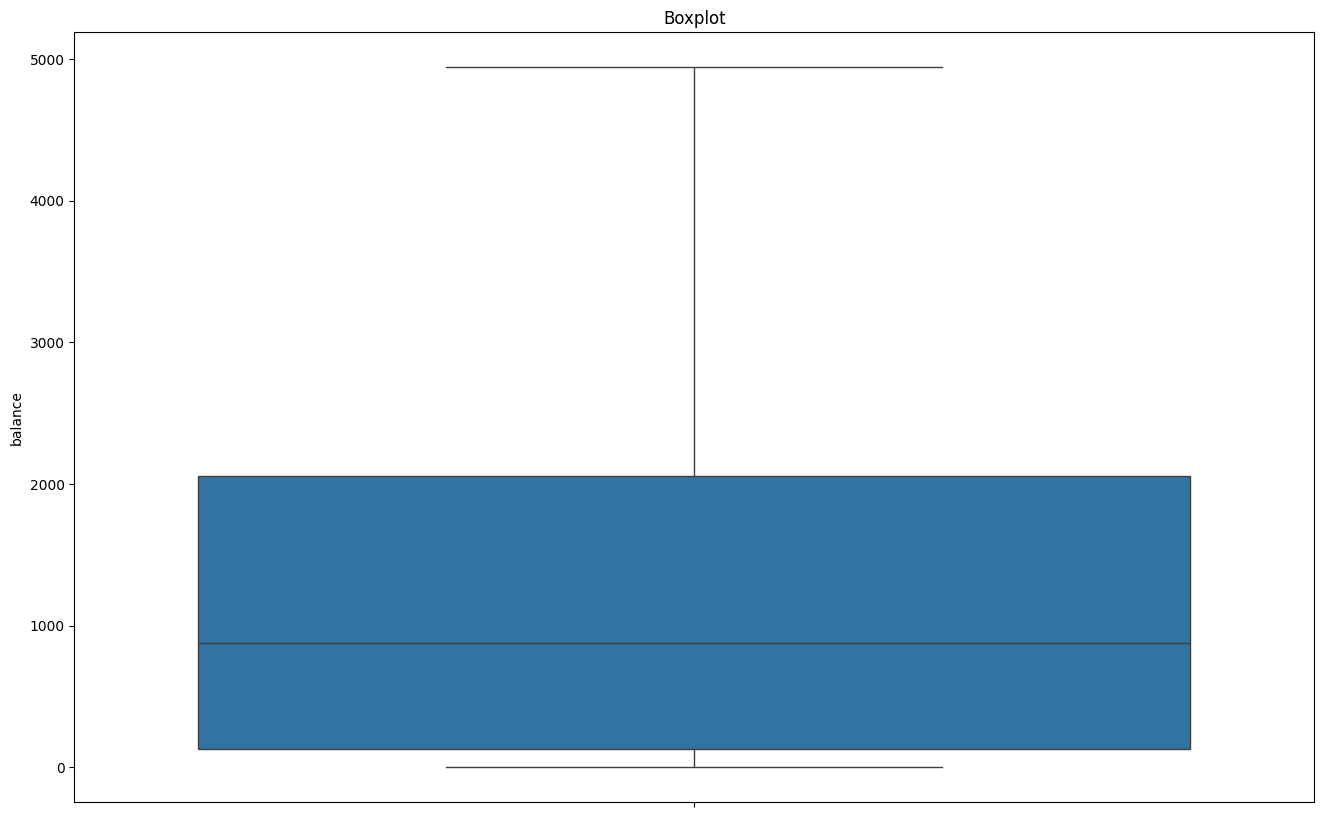

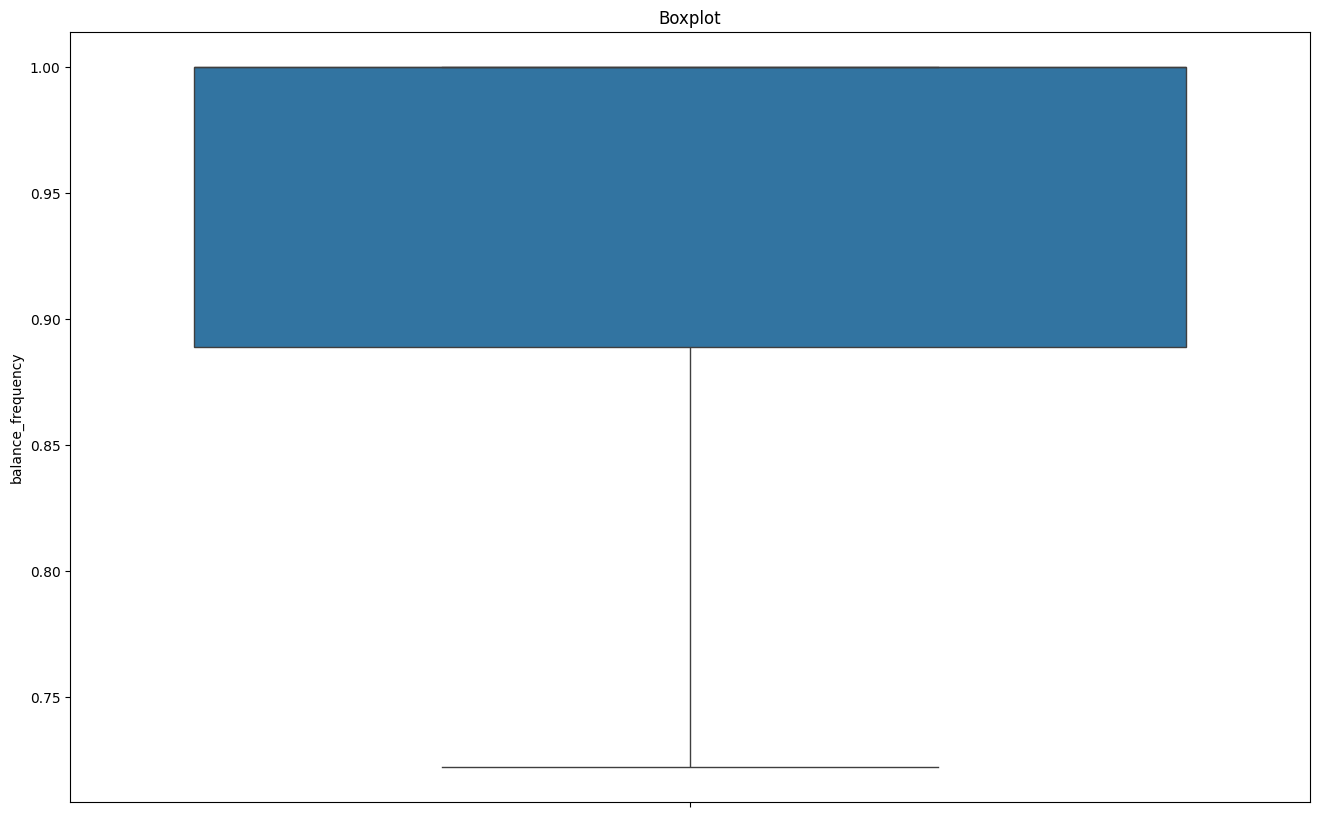

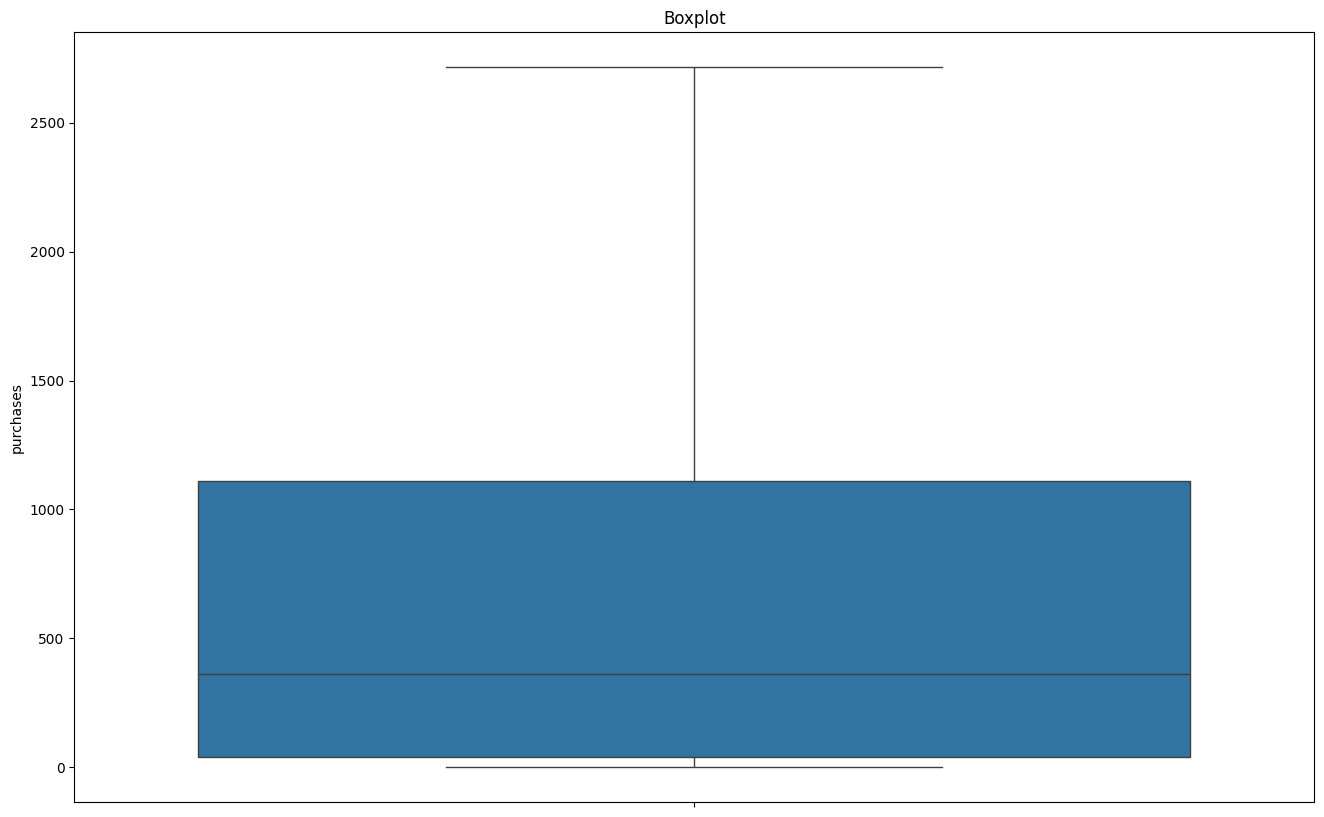

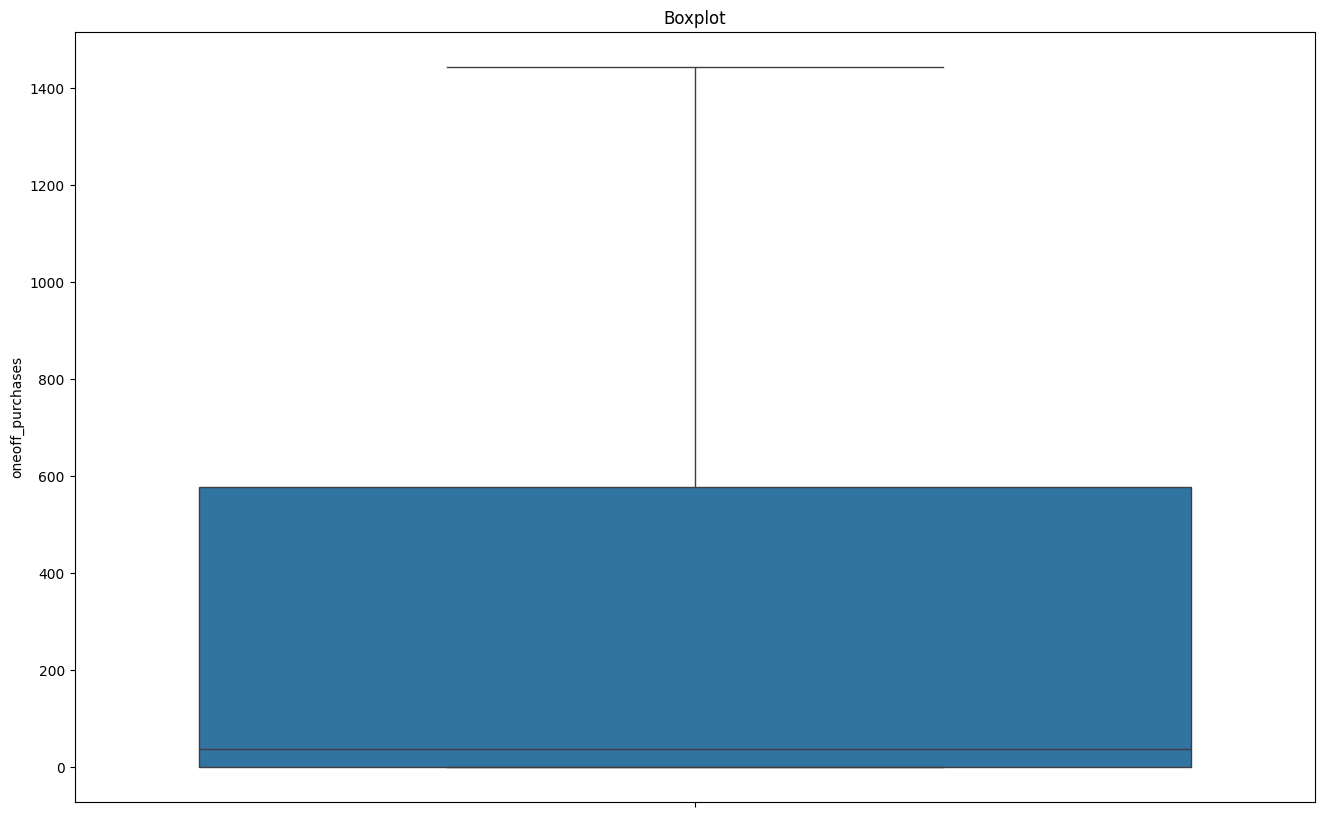

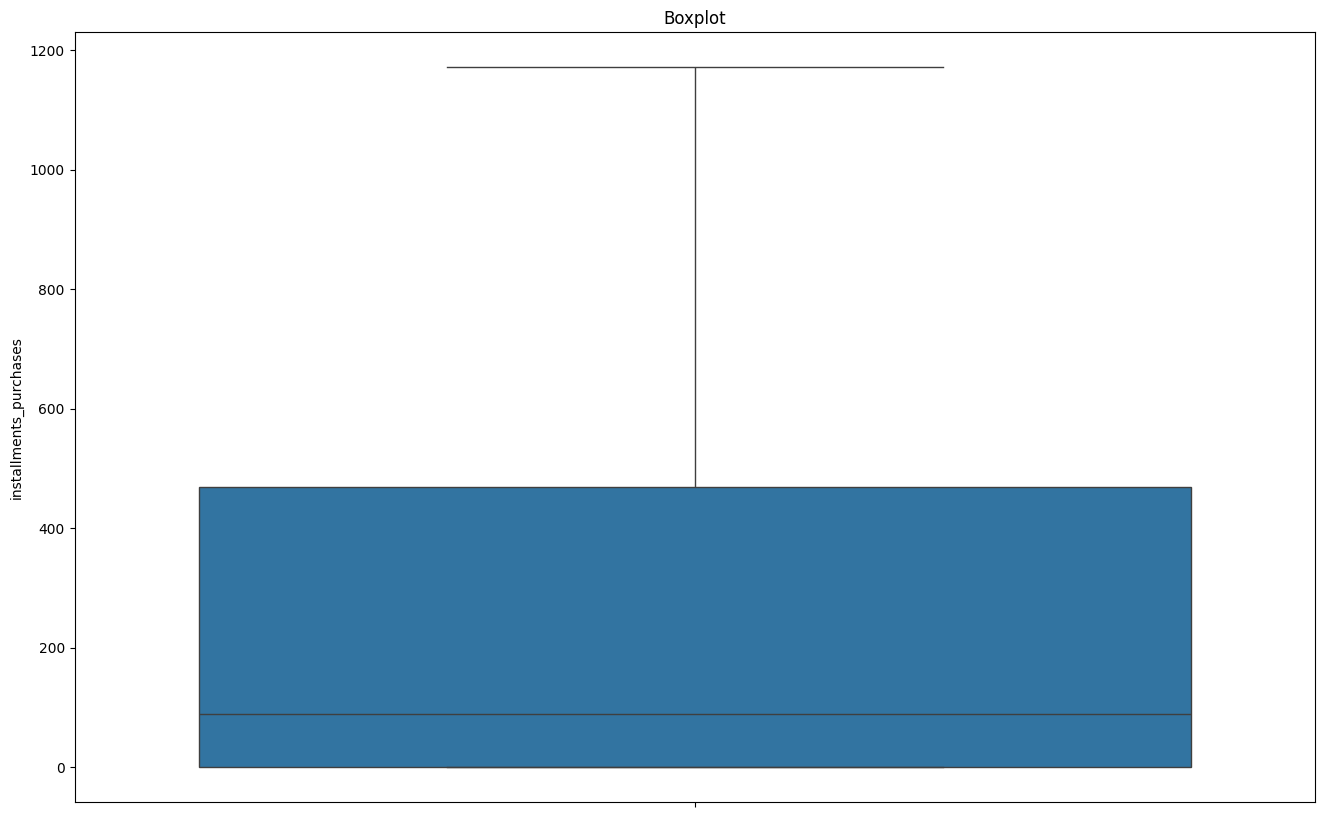

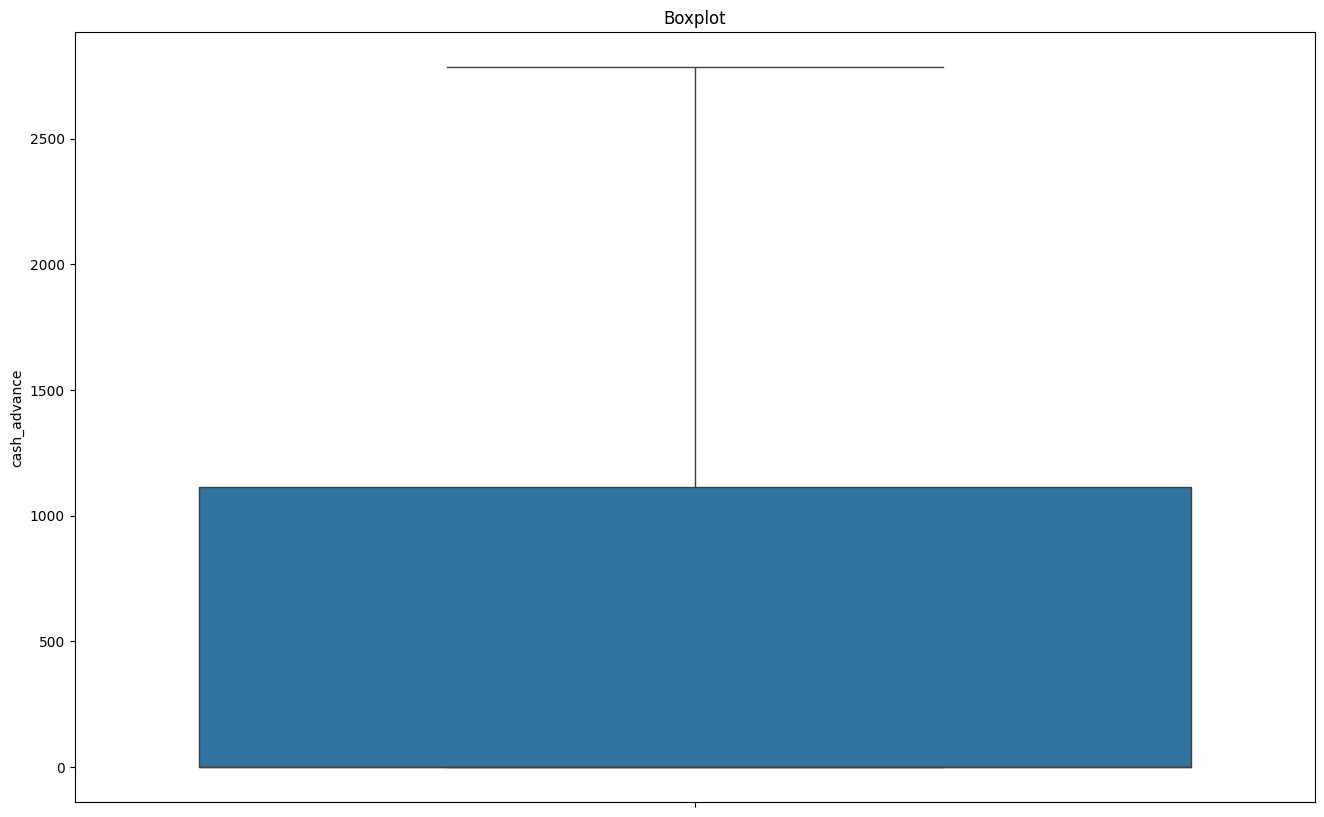

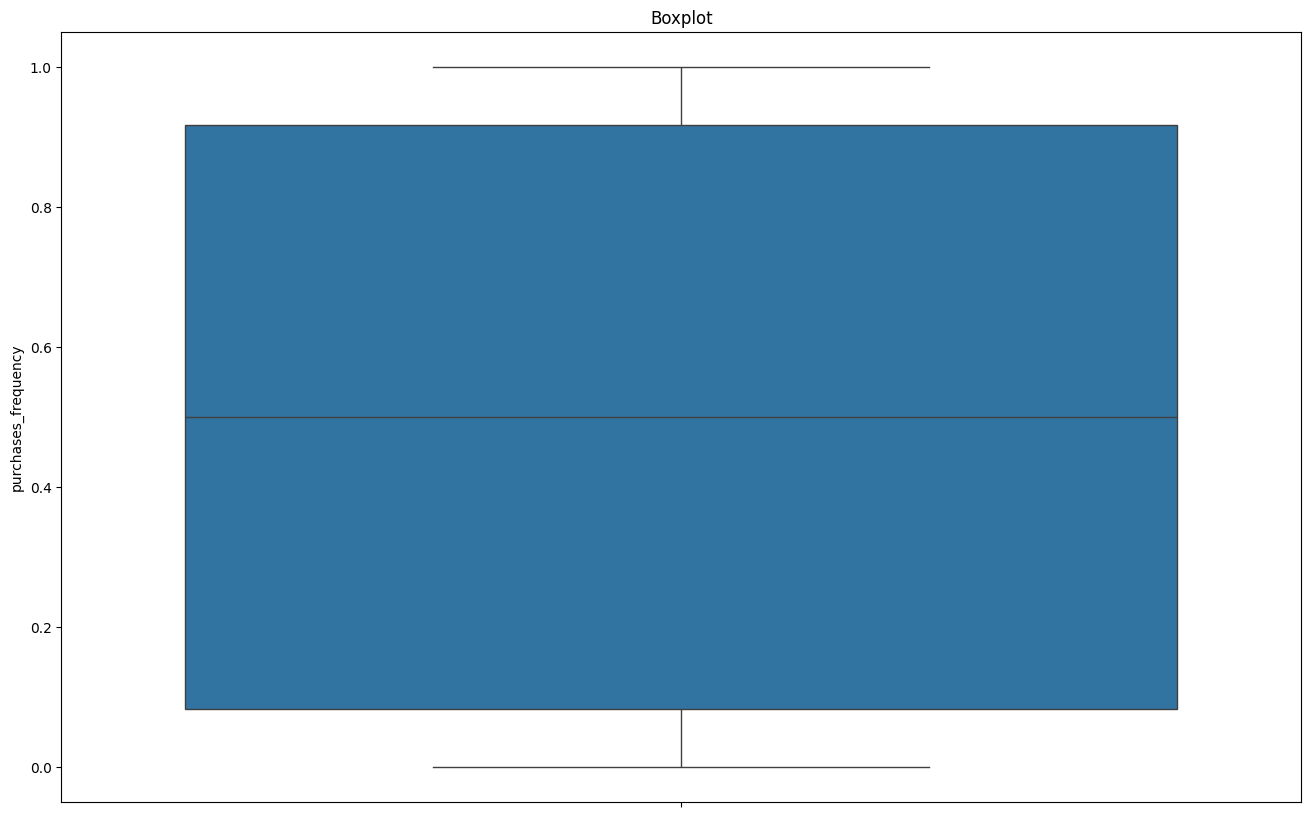

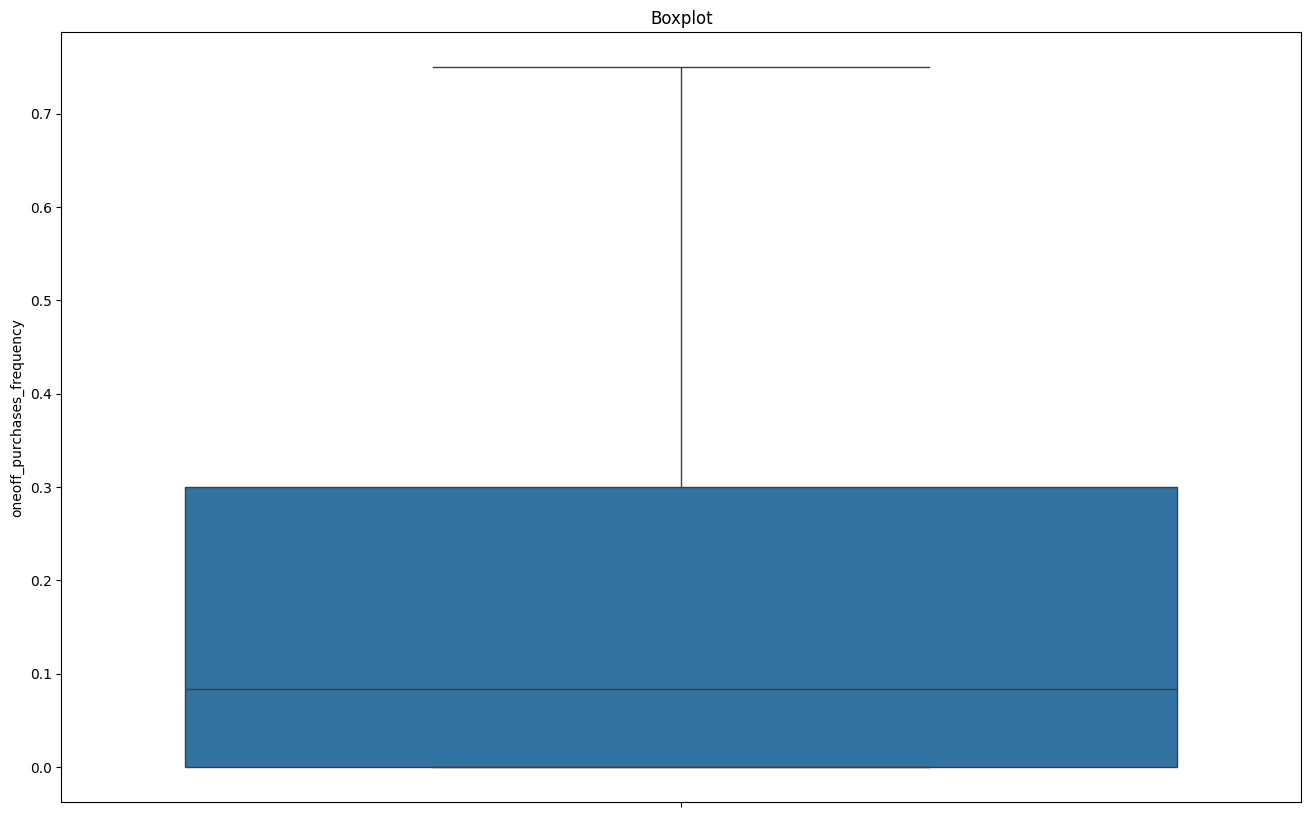

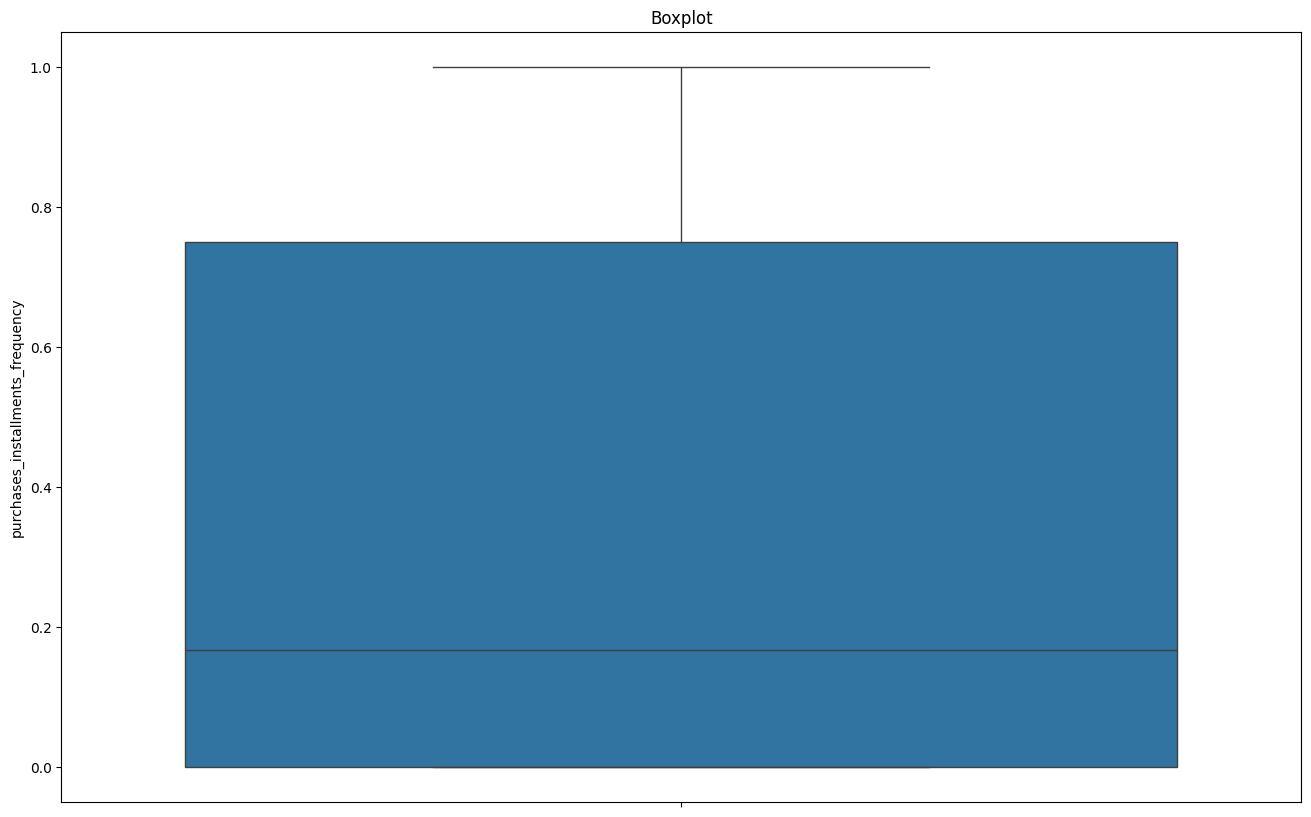

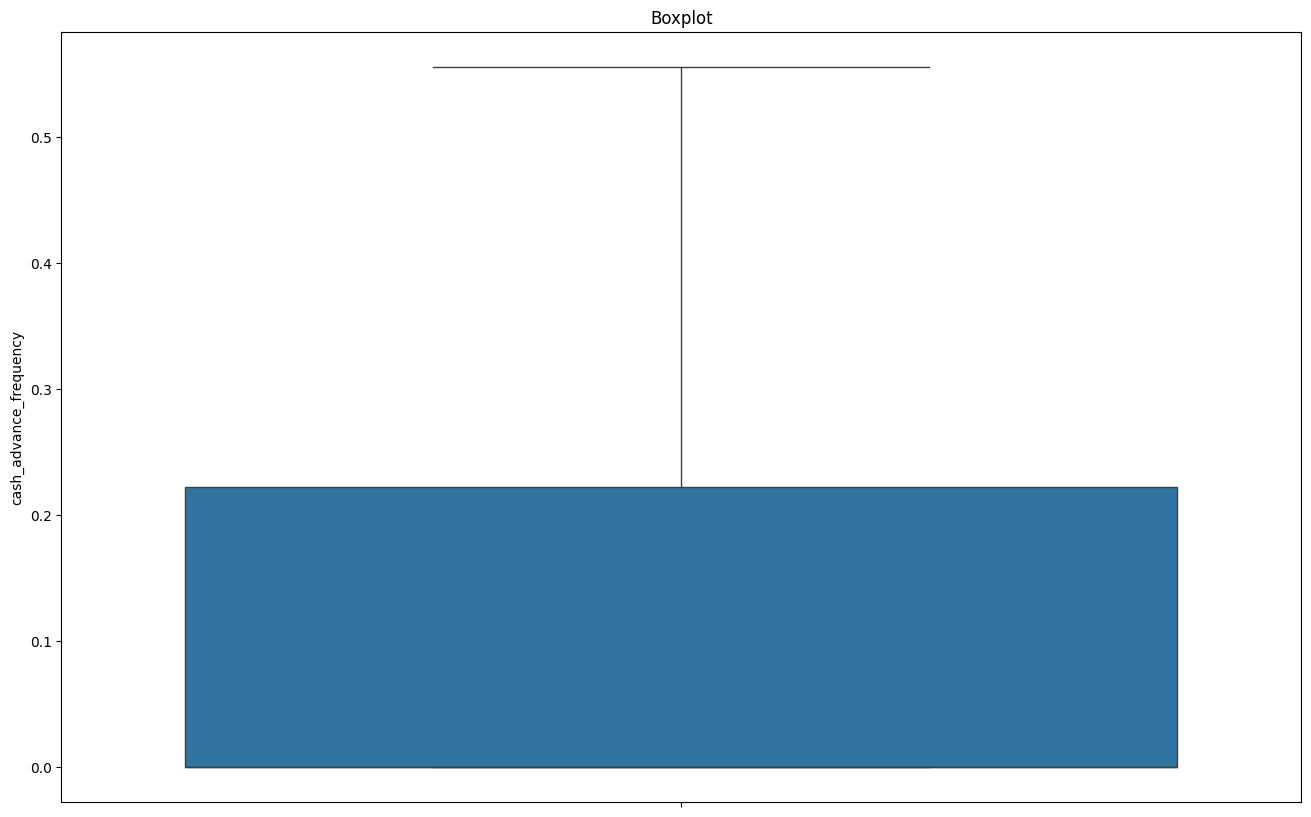

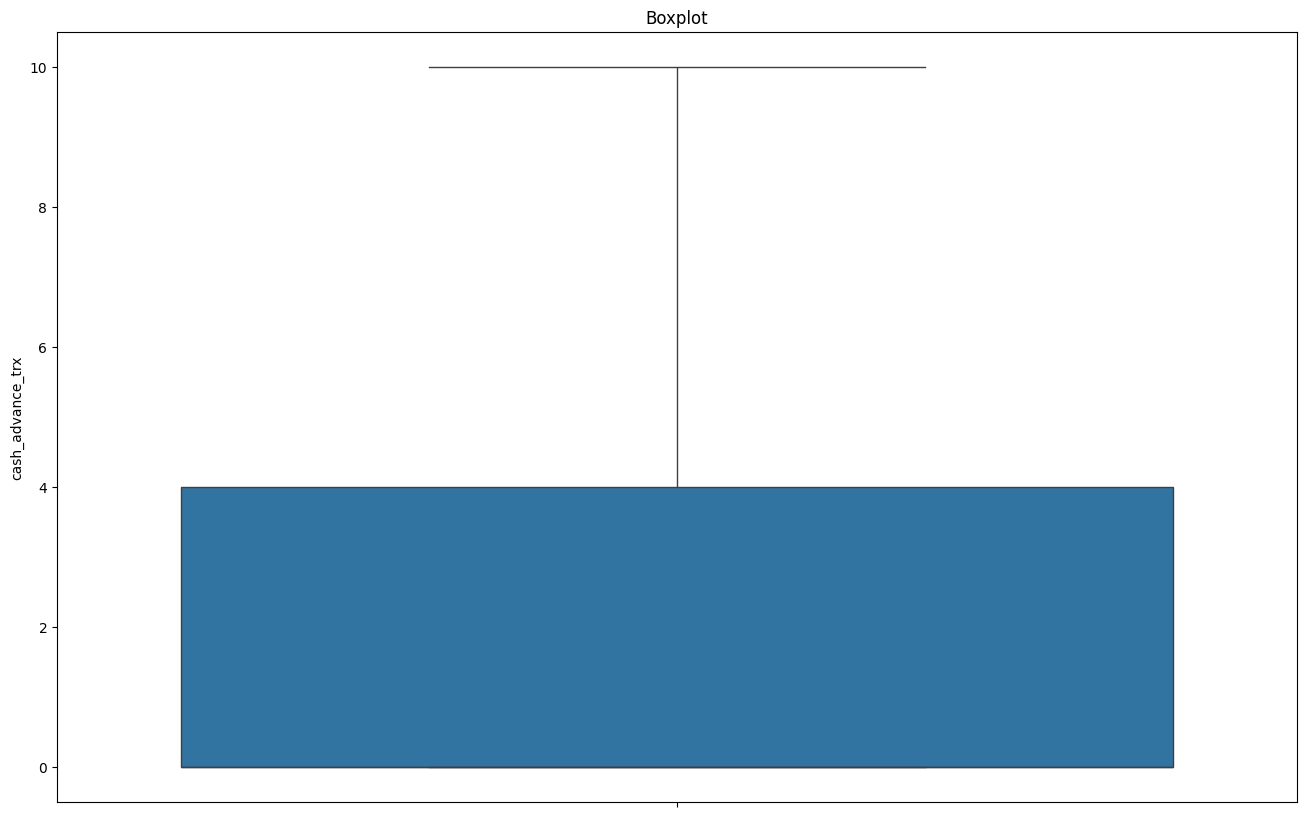

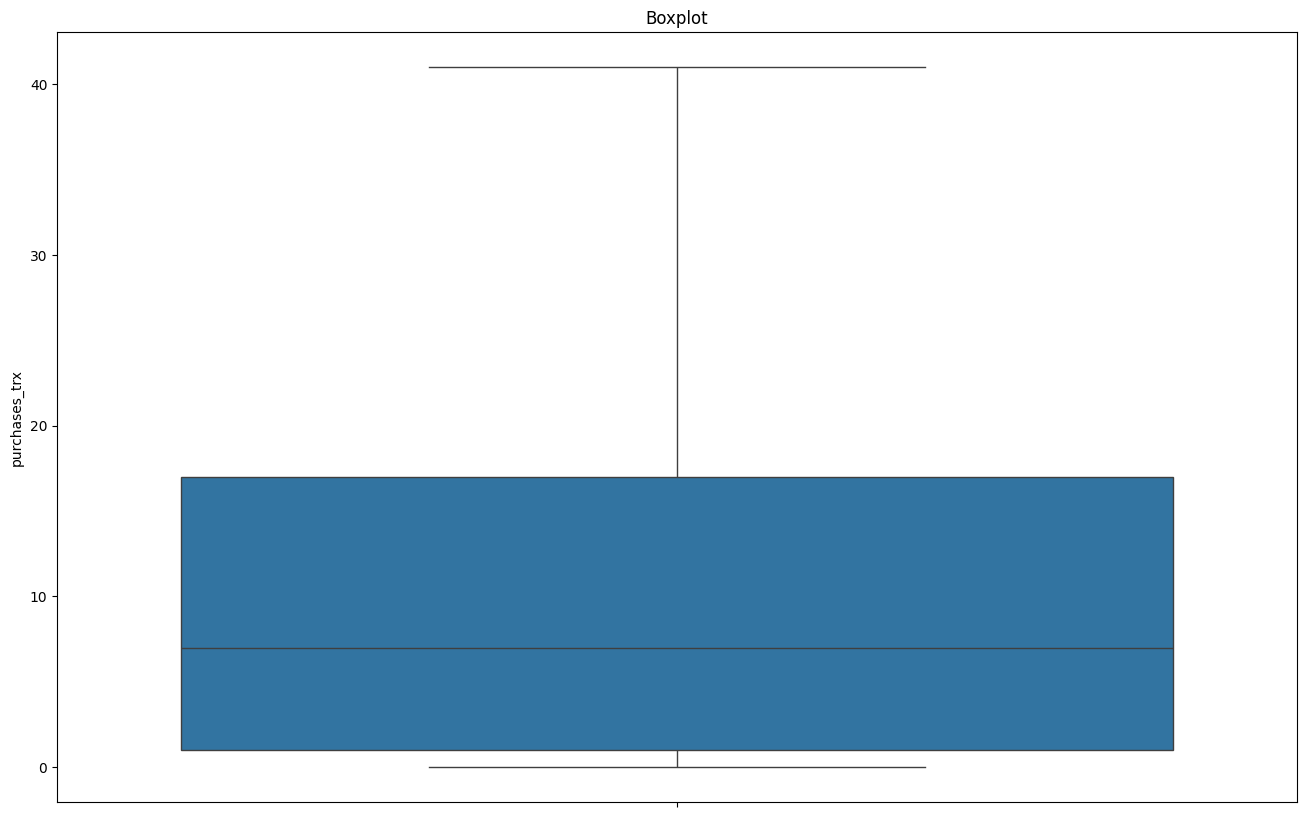

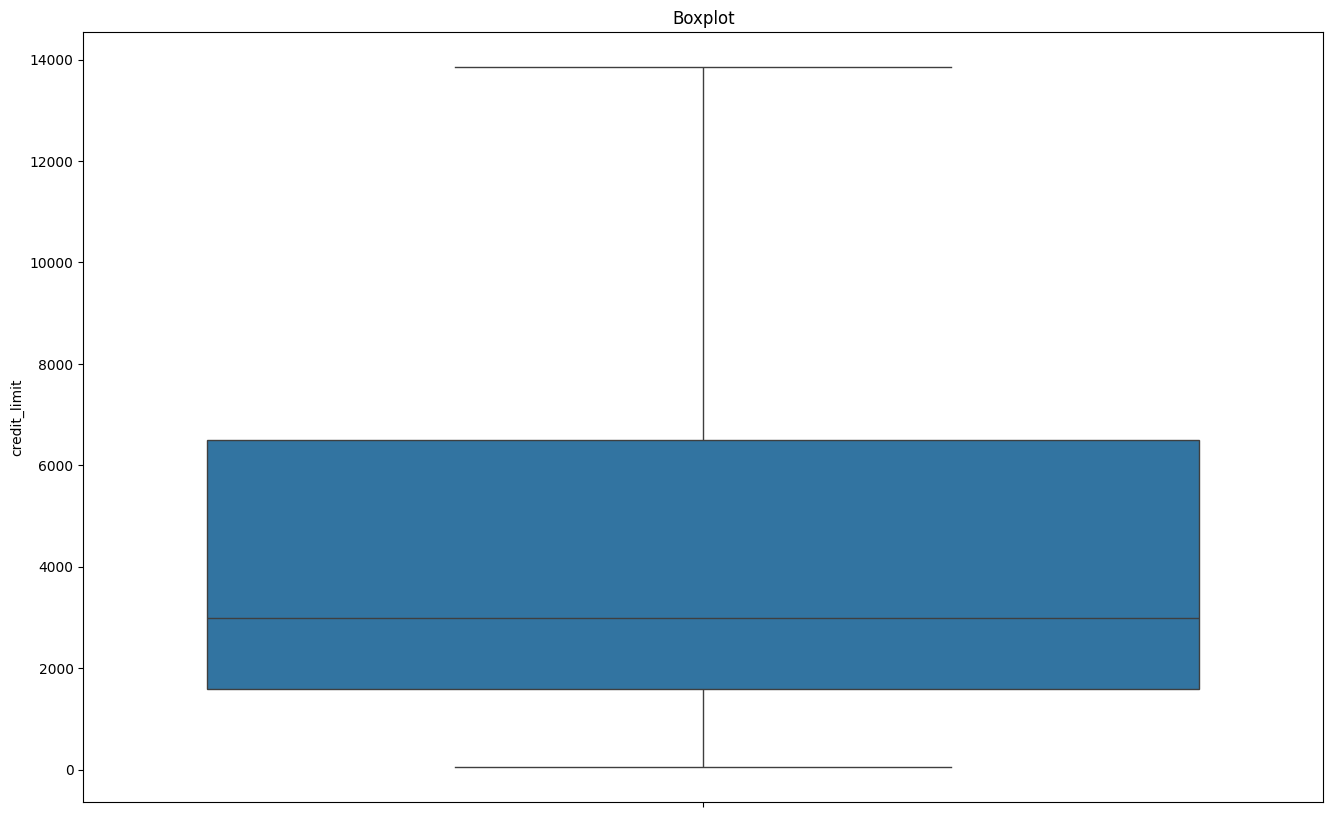

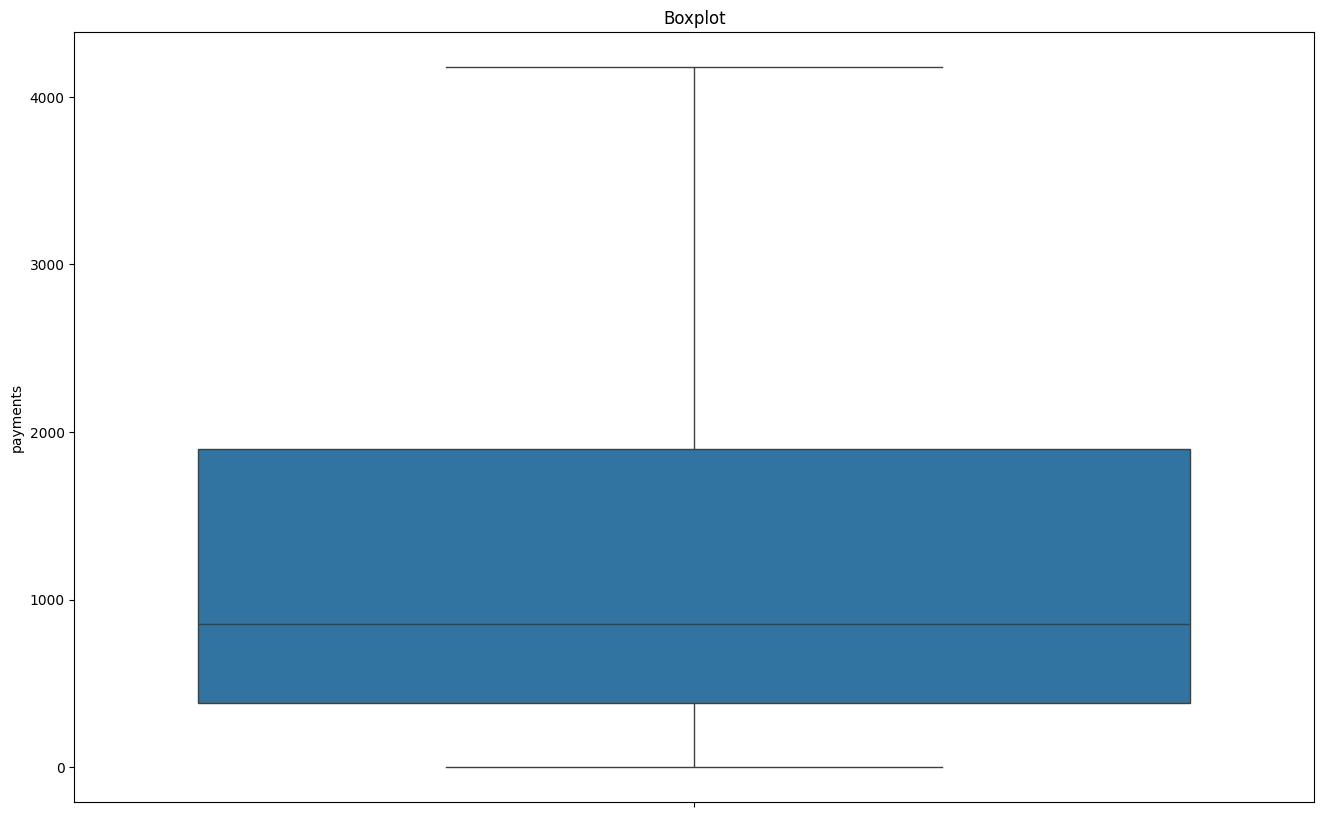

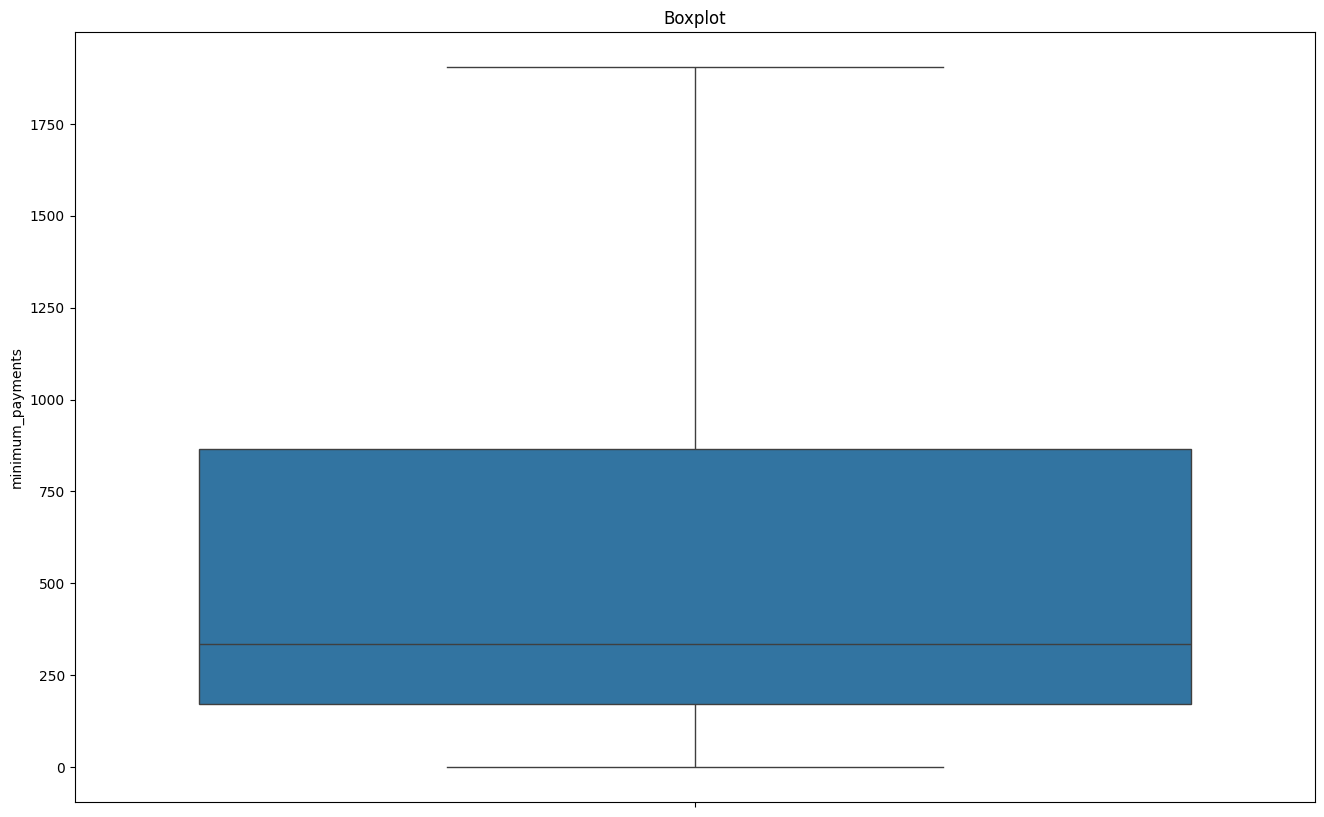

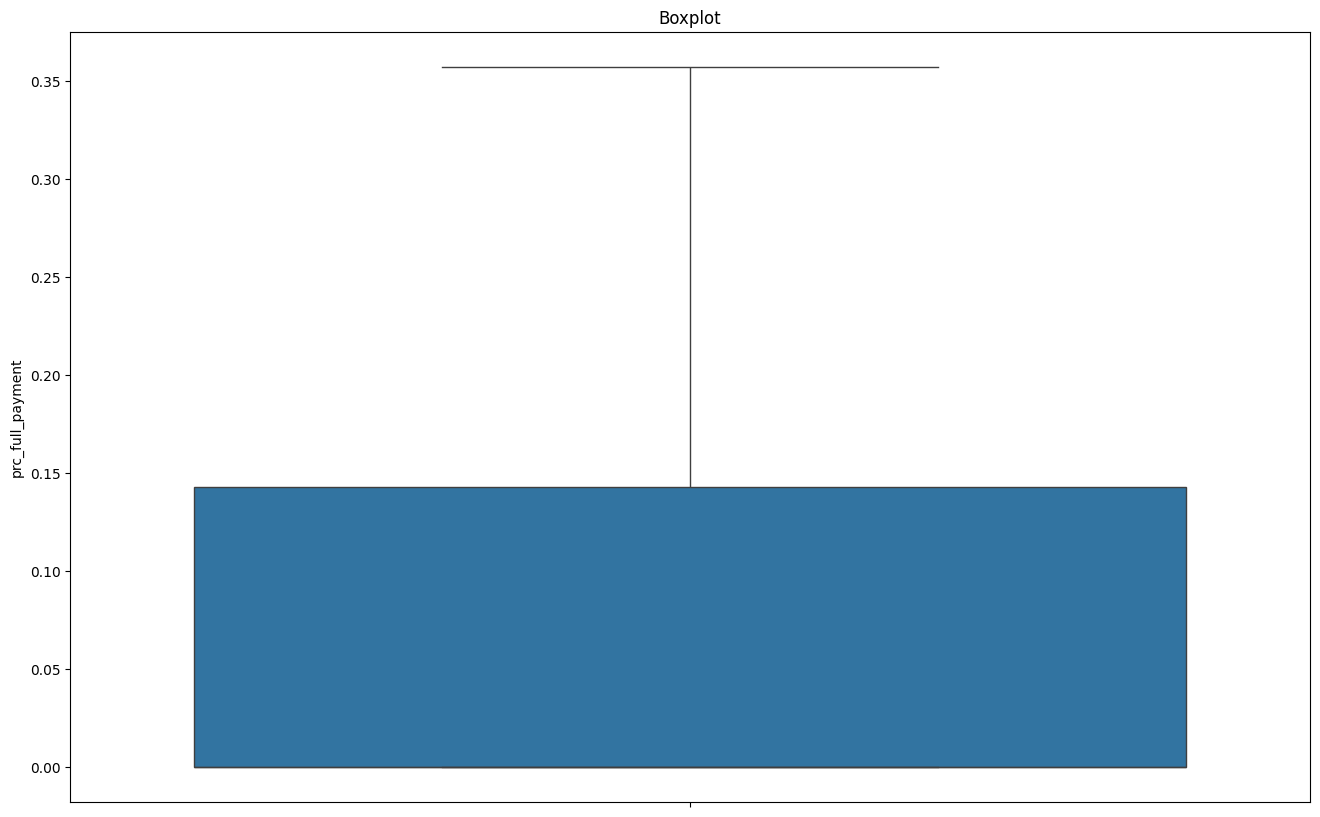

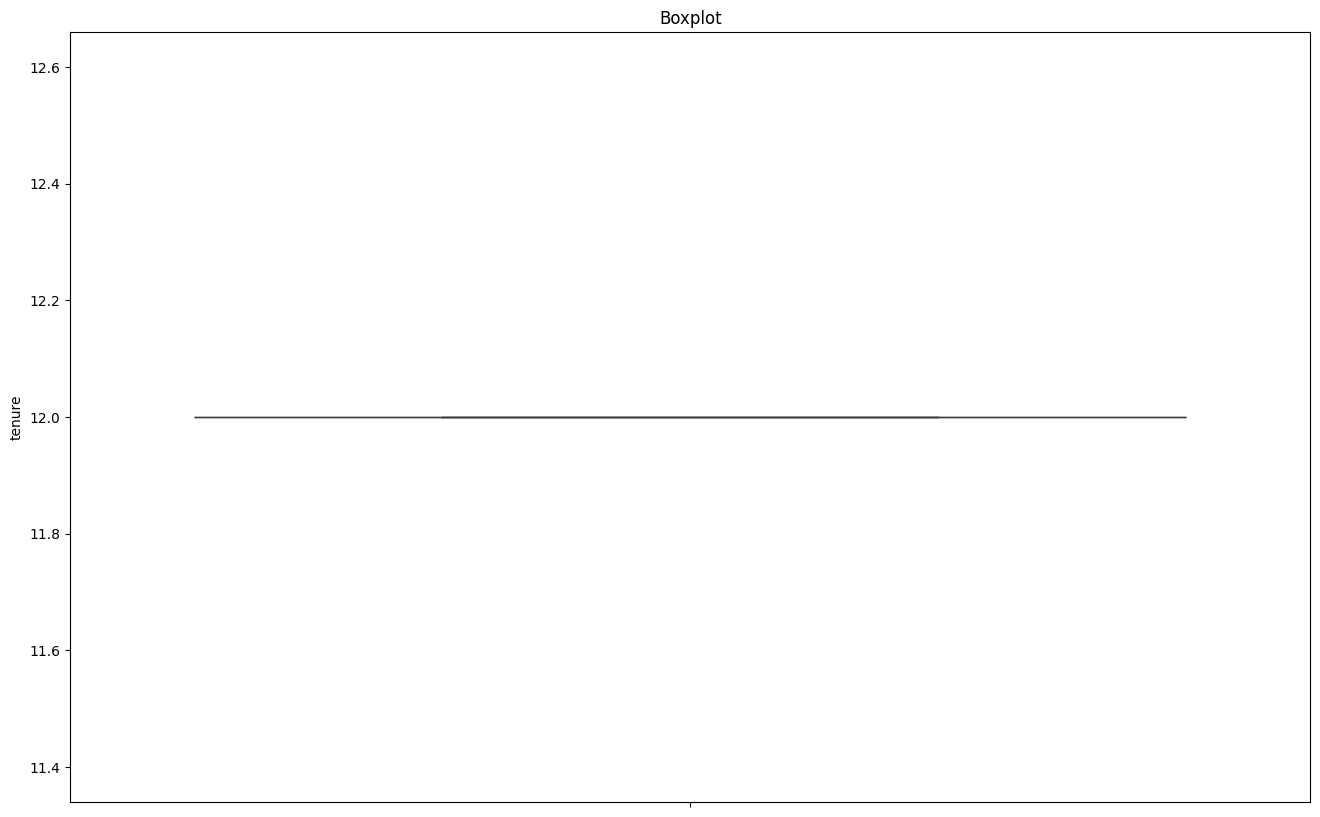

In [14]:
# cek ulang outliers
for col in df.columns:
  plt.figure(figsize=(16,10))
  sns.boxplot(df[col])
  plt.title('Boxplot')

  plt.show()

# E. EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

In [16]:
df.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.722223    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.750000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Melihat Korelasi 

In [17]:
# melihat correlation antar kolom
corr = df.drop(columns='tenure').corr()
corr

balance  balance_frequency  purchases  \
balance                           1.000000           0.403457   0.095805   
balance_frequency                 0.403457           1.000000   0.184972   
purchases                         0.095805           0.184972   1.000000   
oneoff_purchases                  0.124043           0.149539   0.830603   
installments_purchases            0.009457           0.161057   0.706135   
cash_advance                      0.557393           0.102849  -0.177093   
purchases_frequency              -0.108922           0.222217   0.631891   
oneoff_purchases_frequency        0.081477           0.199187   0.683525   
purchases_installments_frequency -0.096473           0.180675   0.488919   
cash_advance_frequency            0.497089           0.186646  -0.207612   
cash_advance_trx                  0.500925           0.175467  -0.190023   
purchases_trx                     0.057123           0.248062   0.808546   
credit_limit                      0.488516           0.107968   0.330410   
payments                          0.350558           0.133318   0.501153   
minimum_payments                  0.802934           0.306531   0.071449   
prc_full_payment                 -0.419972          -0.183459   0.212936   

                                  oneoff_purchases  installments_purchases  \
balance                                   0.124043                0.009457   
balance_frequency                         0.149539                0.161057   
purchases                                 0.830603                0.706135   
oneoff_purchases                          1.000000                0.286764   
installments_purchases                    0.286764                1.000000   
cash_advance                             -0.116870               -0.185467   
purchases_frequency                       0.408137                0.688315   
oneoff_purchases_frequency                0.821933                0.249382   
purchases_installments_frequency          0.152872                0.780193   
cash_advance_frequency                   -0.127137               -0.220042   
cash_advance_trx                         -0.117956               -0.200208   
purchases_trx                             0.622341                0.725475   
credit_limit                              0.321476                0.191926   
payments                                  0.422124                0.324137   
minimum_payments                          0.045047                0.052574   
prc_full_payment                          0.091038                0.254259   

                                  cash_advance  purchases_frequency  \
balance                               0.557393            -0.108922   
balance_frequency                     0.102849             0.222217   
purchases                            -0.177093             0.631891   
oneoff_purchases                     -0.116870             0.408137   
installments_purchases               -0.185467             0.688315   
cash_advance                          1.000000            -0.319499   
purchases_frequency                  -0.319499             1.000000   
oneoff_purchases_frequency           -0.134830             0.499498   
purchases_installments_frequency     -0.264589             0.862934   
cash_advance_frequency                0.769767            -0.336823   
cash_advance_trx                      0.801425            -0.315382   
purchases_trx                        -0.203801             0.795194   
credit_limit                          0.258418             0.118192   
payments                              0.331303             0.163930   
minimum_payments                      0.420883            -0.052645   
prc_full_payment                     -0.227197             0.316356   

                                  oneoff_purchases_frequency  \
balance                                             0.081477   
balance_frequency                                   0.199187   
purchases      

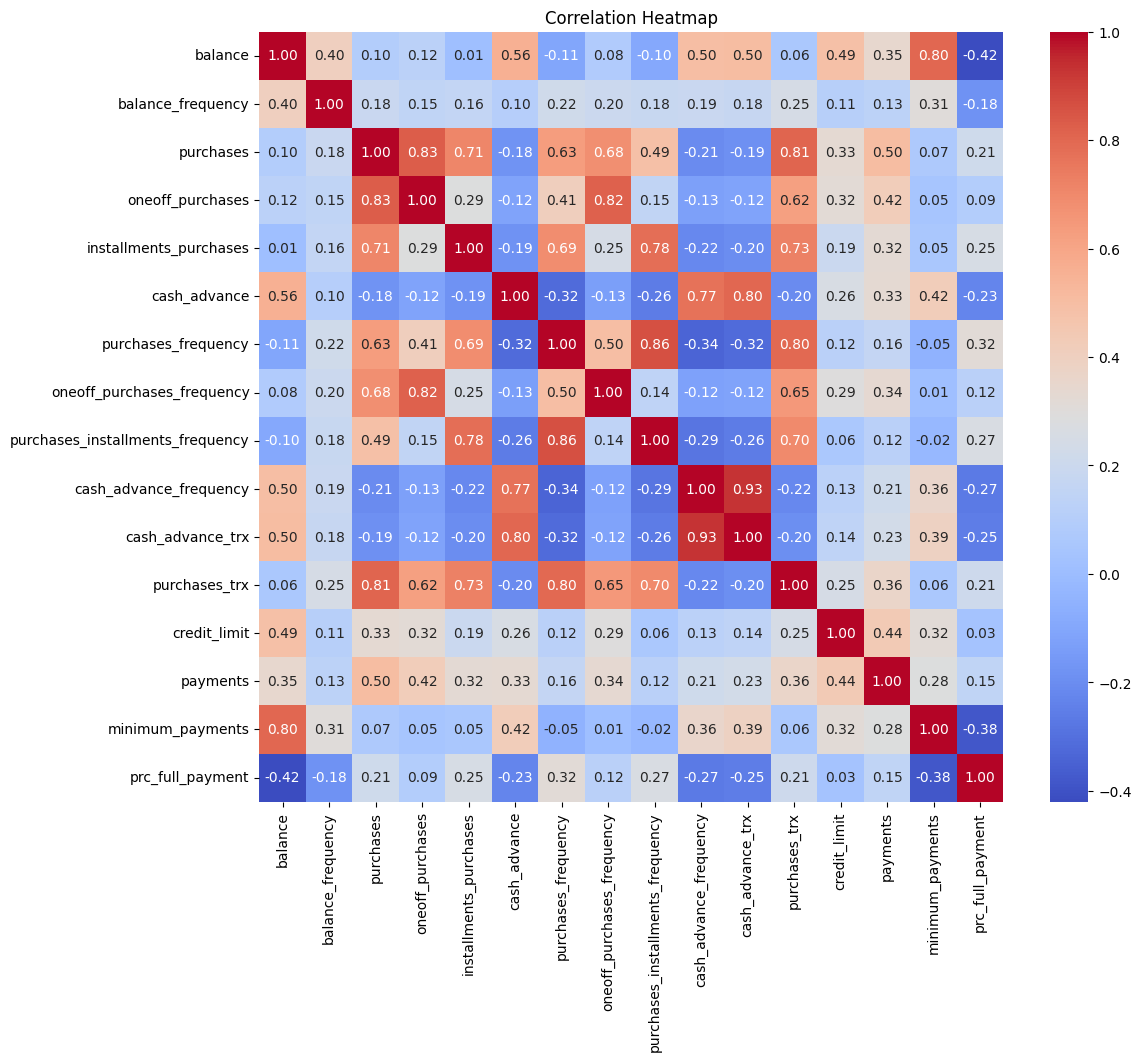

In [18]:
# melihat lewat heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Kesimpulan yang bisa didapat dari korelasi matrix pada dataset ini yaitu, ada beberapa hubungan yang kuat antara variabel-variabel dalam dataset. Saldo akun memiliki korelasi yang cukup signifikan dengan beberapa variabel seperti jumlah pembelian, jumlah uang tunai yang ditarik, batas kredit, dan pembayaran minimum. Korelasi-korelasi ini memberi gambaran tentang bagaimana perilaku pengguna kartu kredit dapat saling mempengaruhi dan berkaitan satu sama lain dalam konteks pengelolaan keuangan mereka.

## Melihat Distribusi setiap kolom 

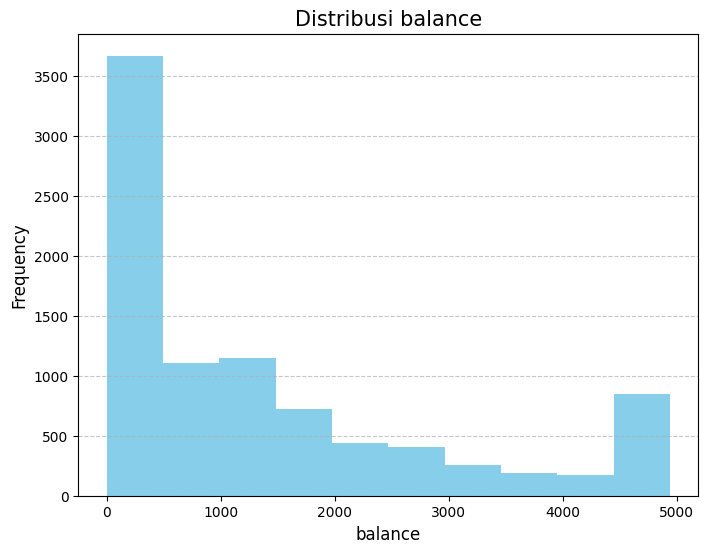

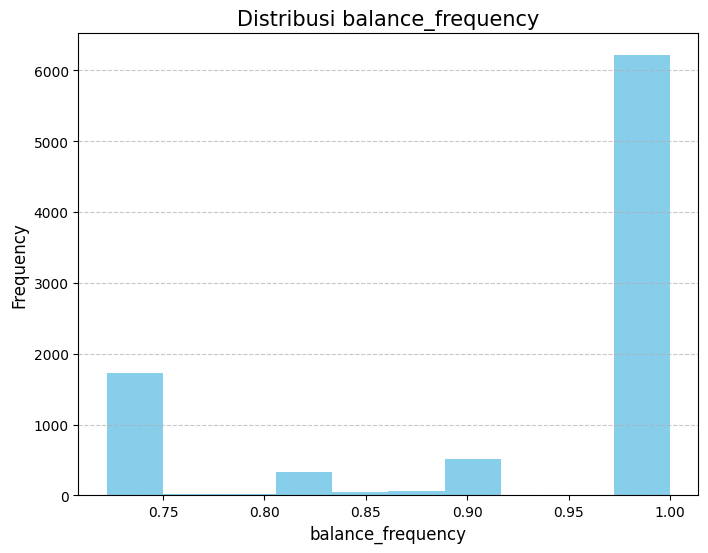

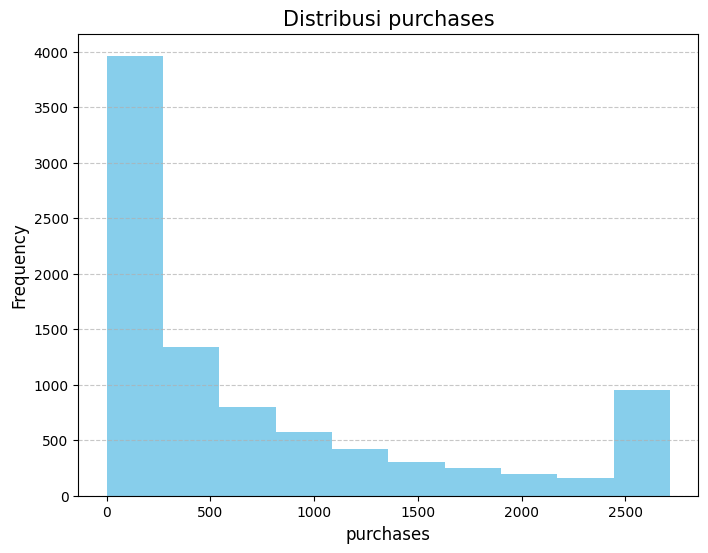

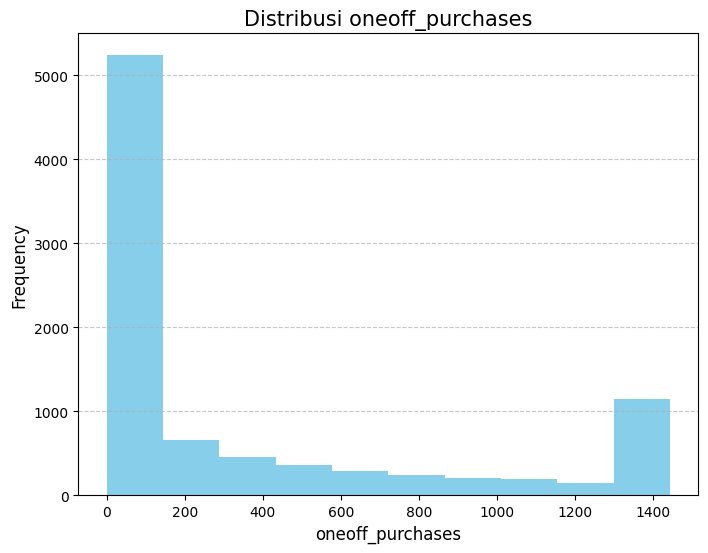

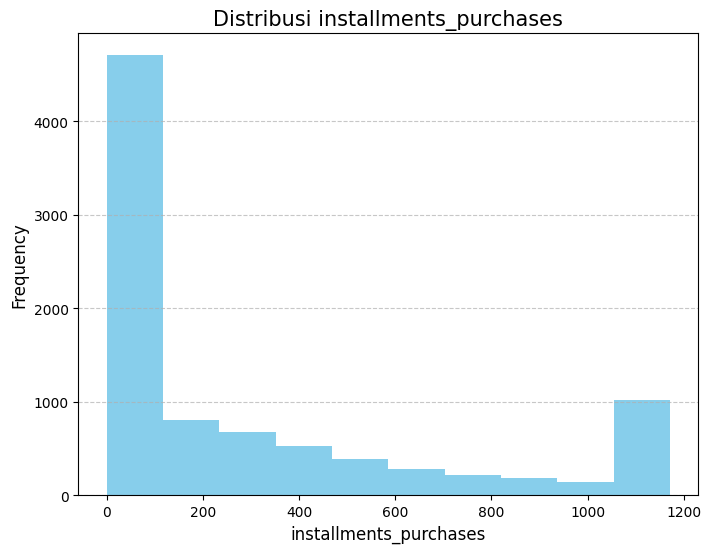

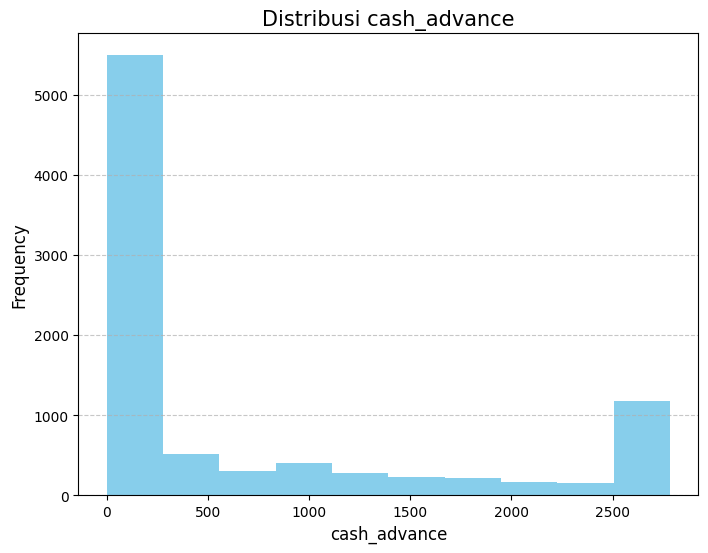

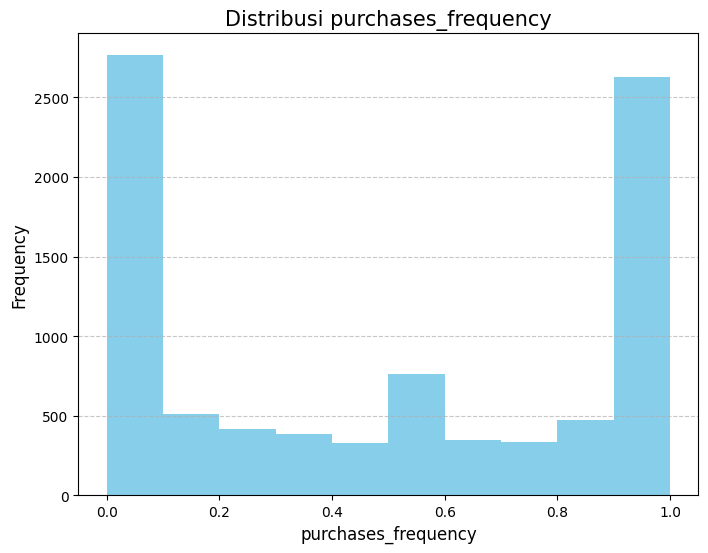

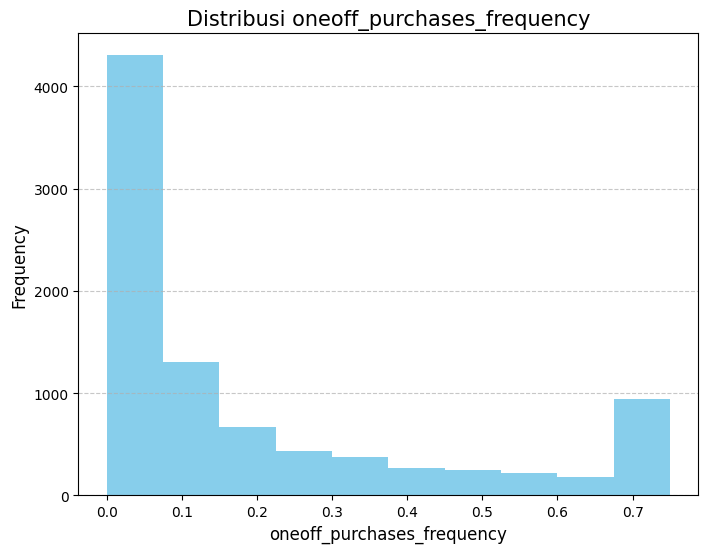

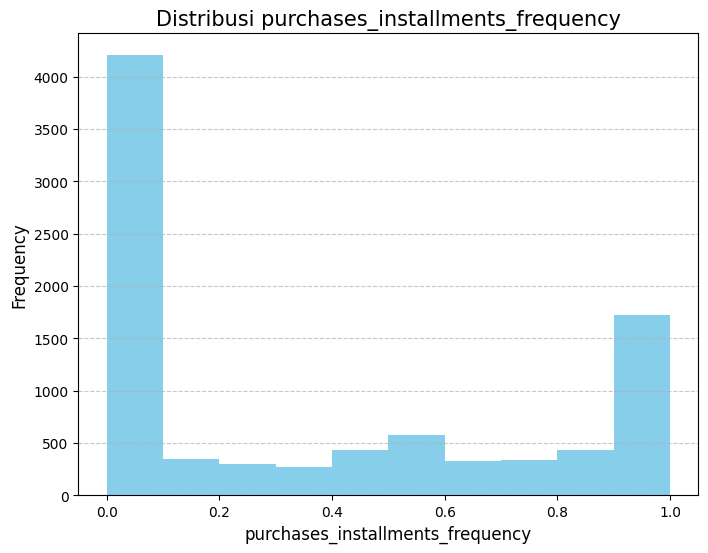

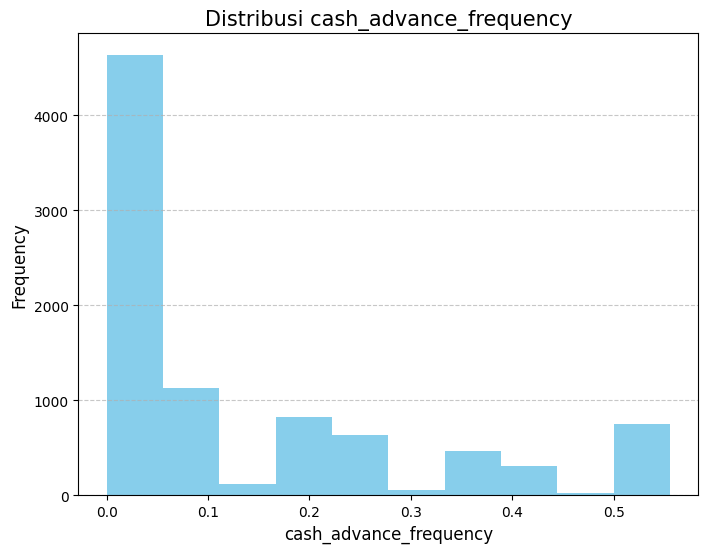

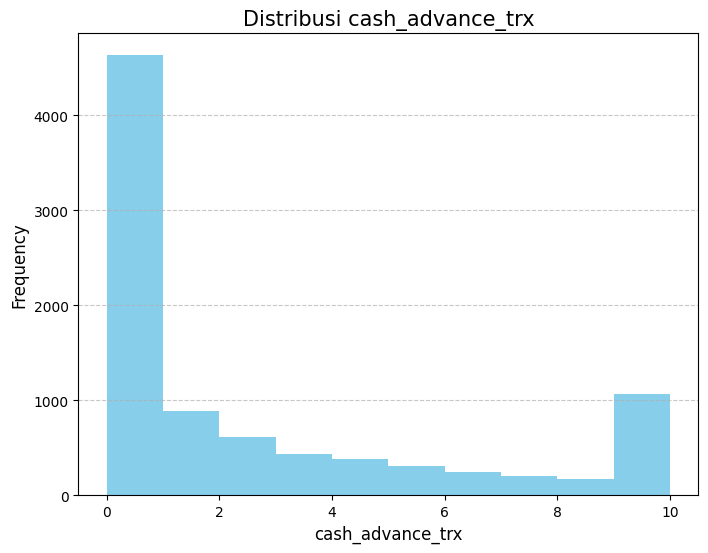

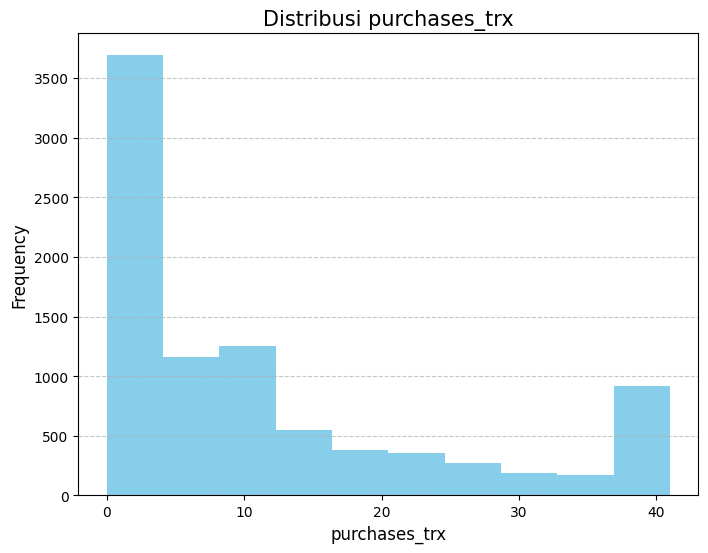

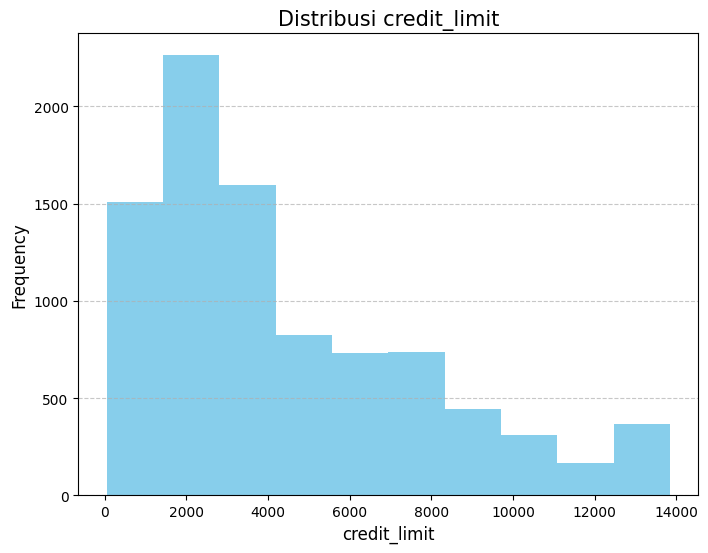

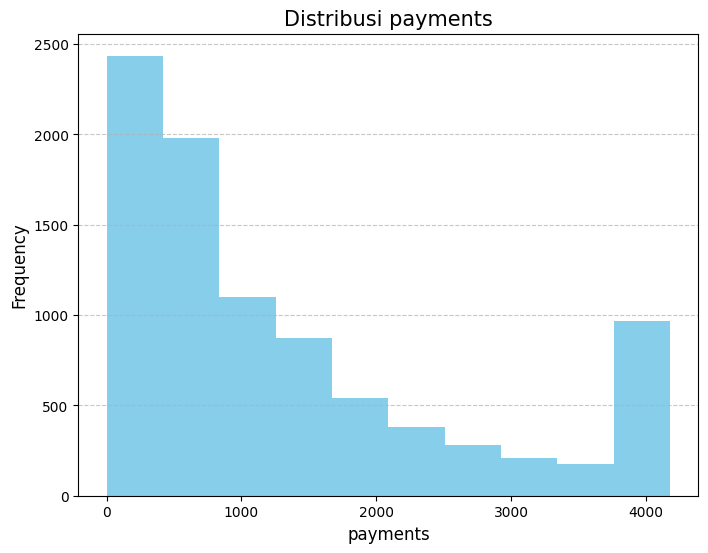

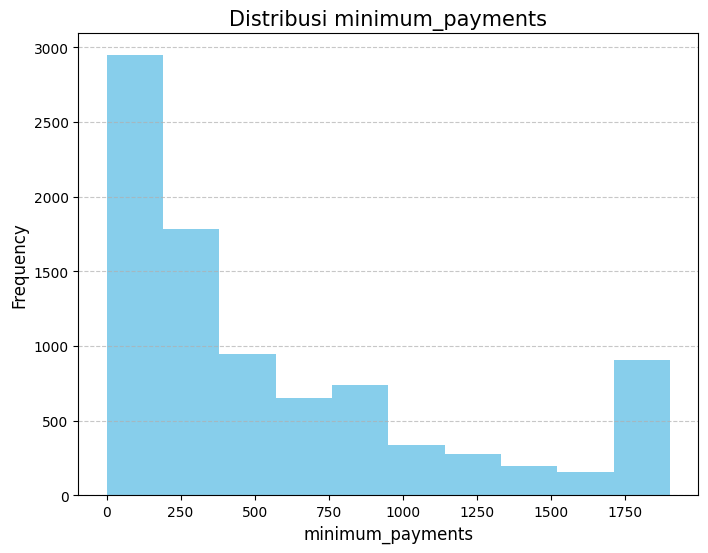

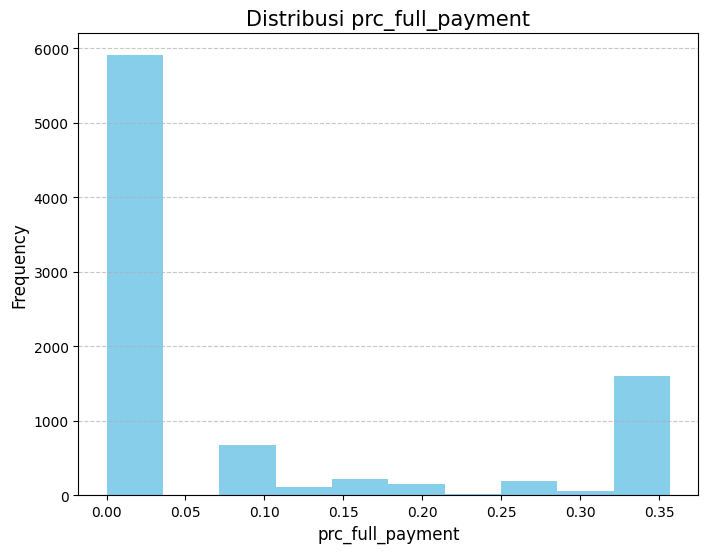

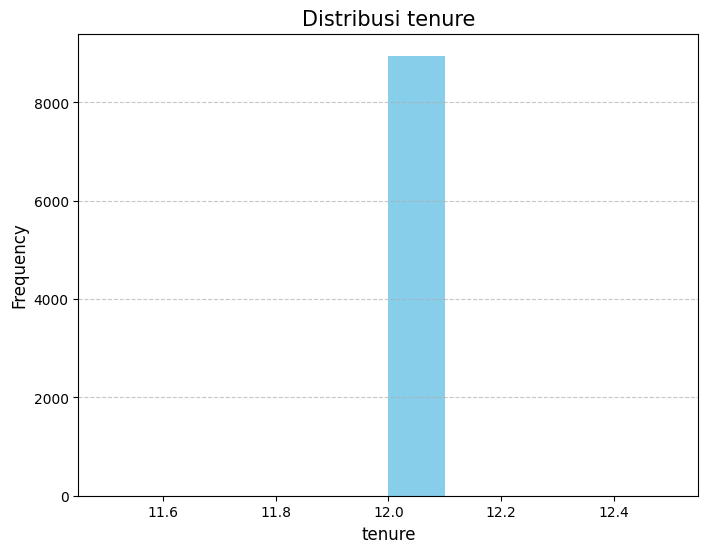

In [19]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='skyblue') 
    plt.title(f'Distribusi {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Analisa Balance

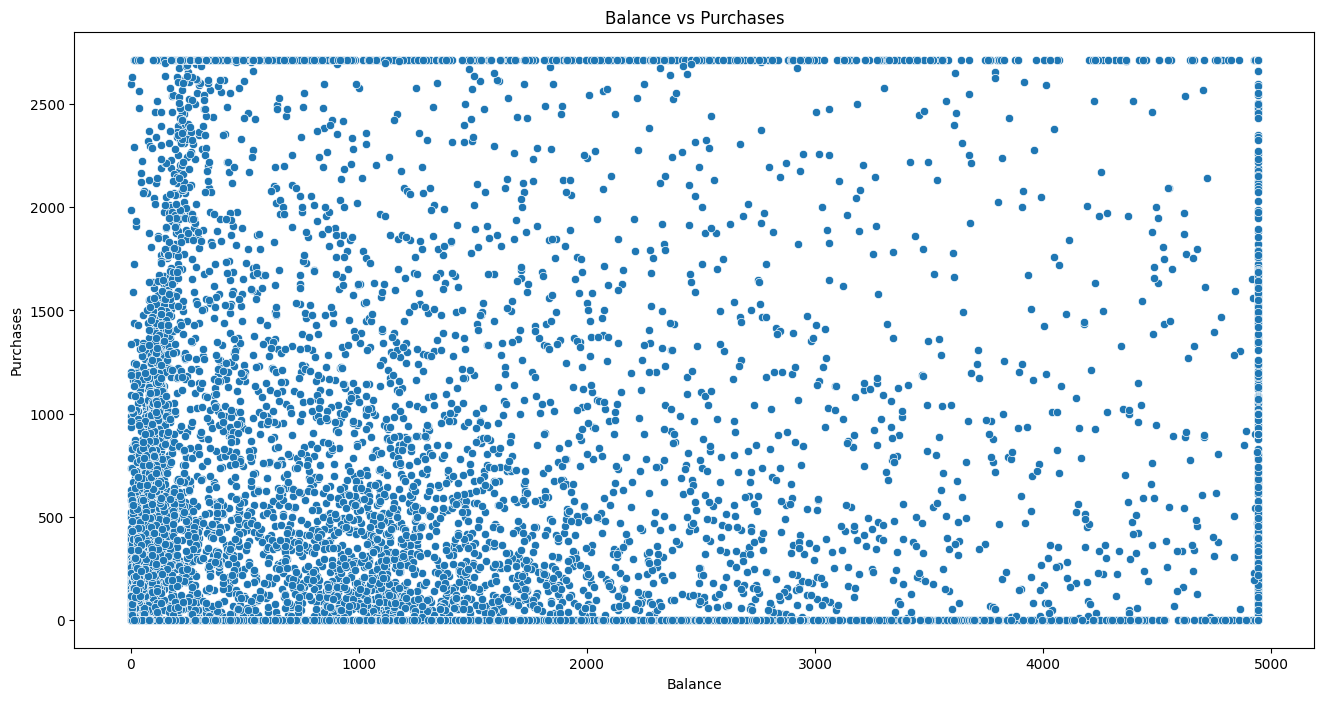

In [20]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='balance', y='purchases', data=df)
plt.title('Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

Bisa terlihat bahwadidalam dataset ini purchases lebih banyak dilakukan pada orang yang mempunyai balance diantara 0 sampai 2000. 
Dan untuk orang yang memiliki balance tinggi 3000 ke atas lebih sedikit melakukan purchases. namun pada balance 5000 terkihat purchases yang dilakukan sangat merata dari 0 sampai lebih dari 2500.

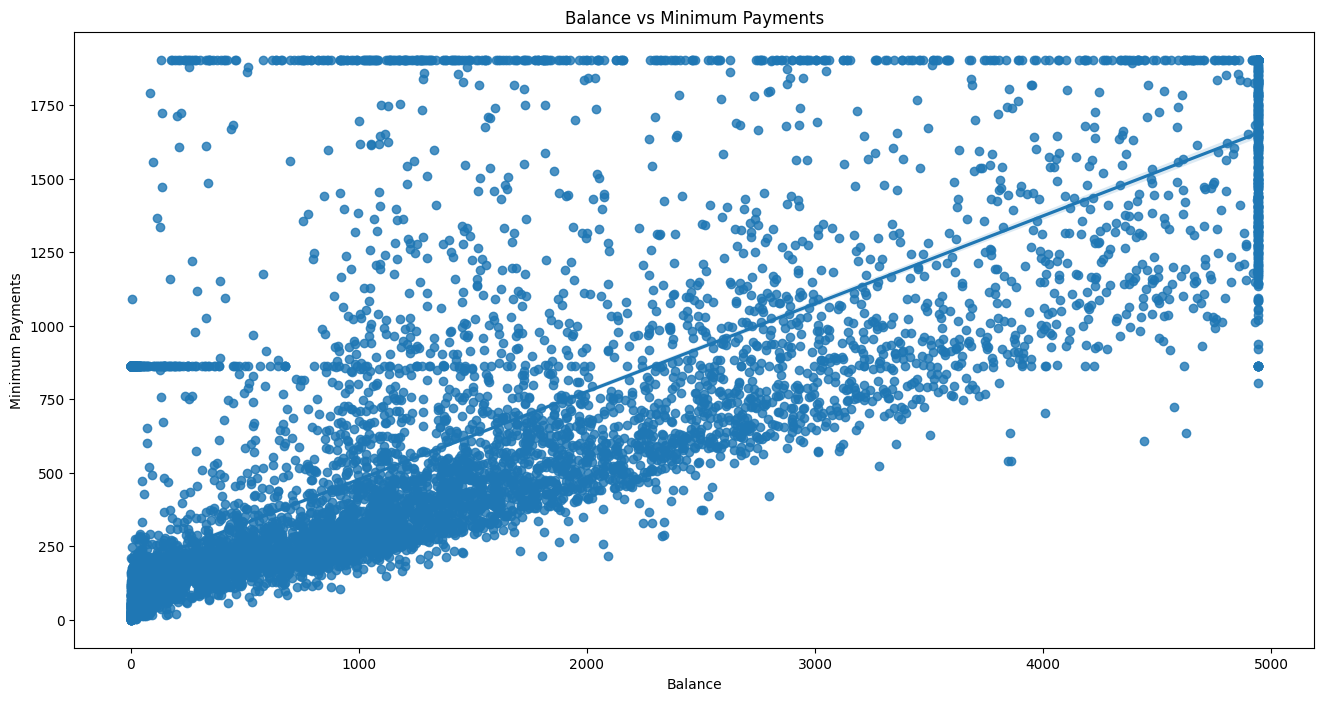

In [21]:
plt.figure(figsize=(16, 8))
sns.regplot(x='balance', y='minimum_payments', data=df)
plt.title('Balance vs Minimum Payments')
plt.xlabel('Balance')
plt.ylabel('Minimum Payments')
plt.show()

terdapat kecenderungan bahwa pengguna dengan saldo yang lebih tinggi cenderung membayar pembayaran minimum yang lebih besar. Hal ini mungkin mengindikasikan bahwa semakin besar saldo yang dimiliki, semakin besar pula kewajiban pembayaran minimum yang harus dilakukan. 

## Analisa Credit Limit 

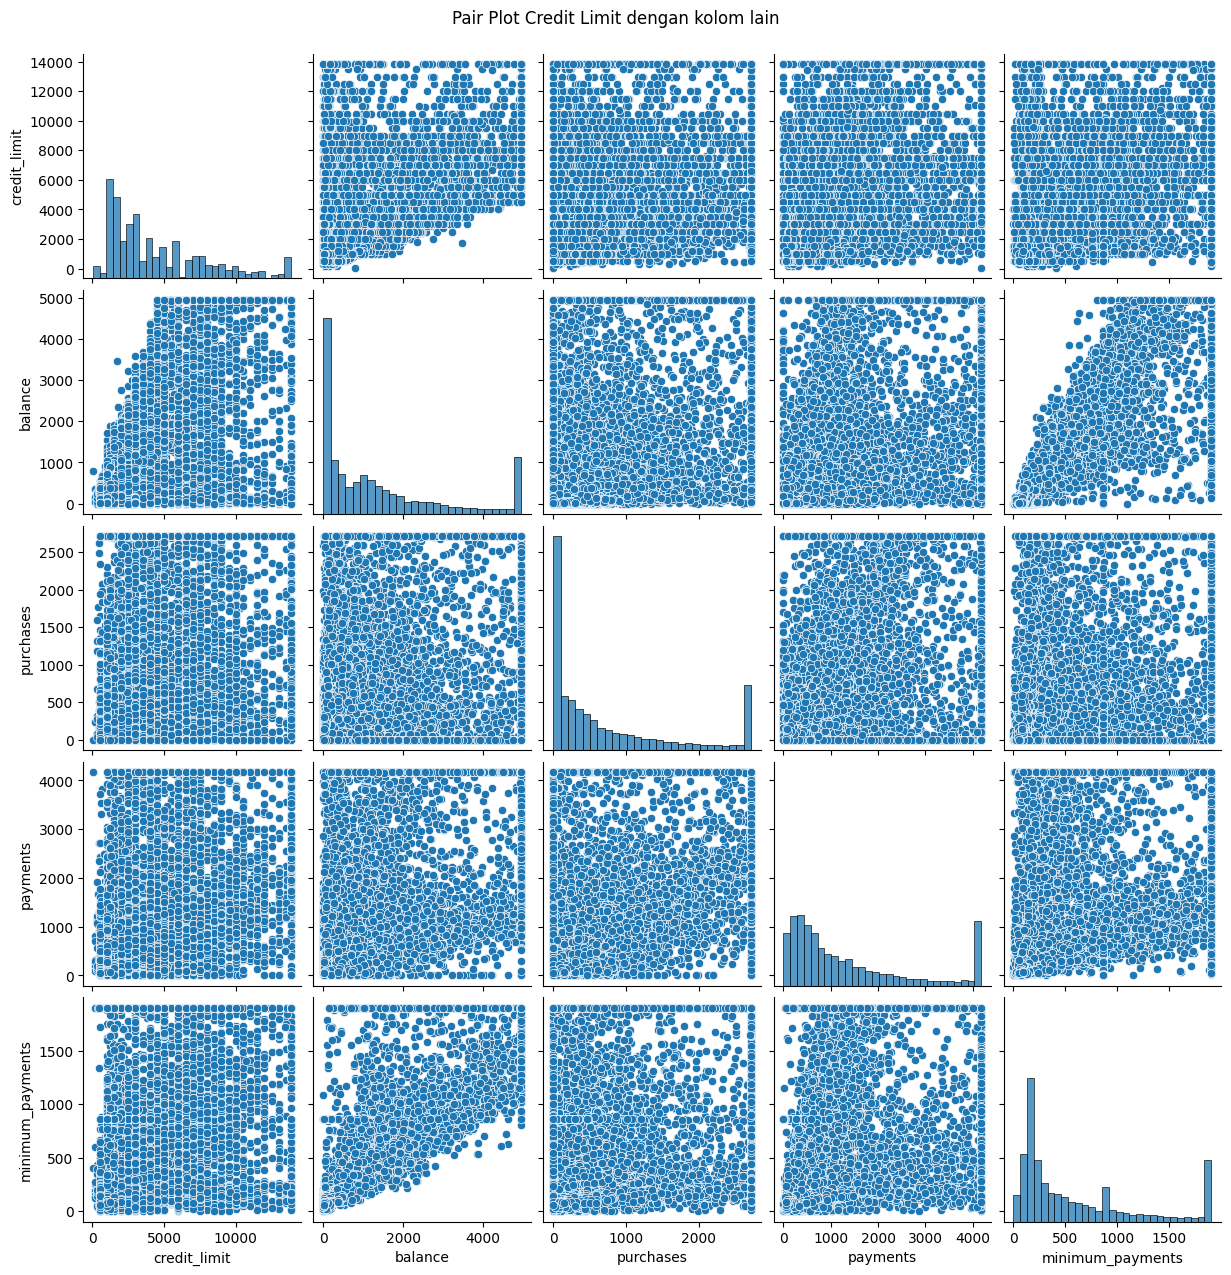

In [22]:
selected_columns = ['credit_limit', 'balance', 'purchases', 'payments', 'minimum_payments']

# Membuat pair plot
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot Credit Limit dengan kolom lain', y=1.02)
plt.show()

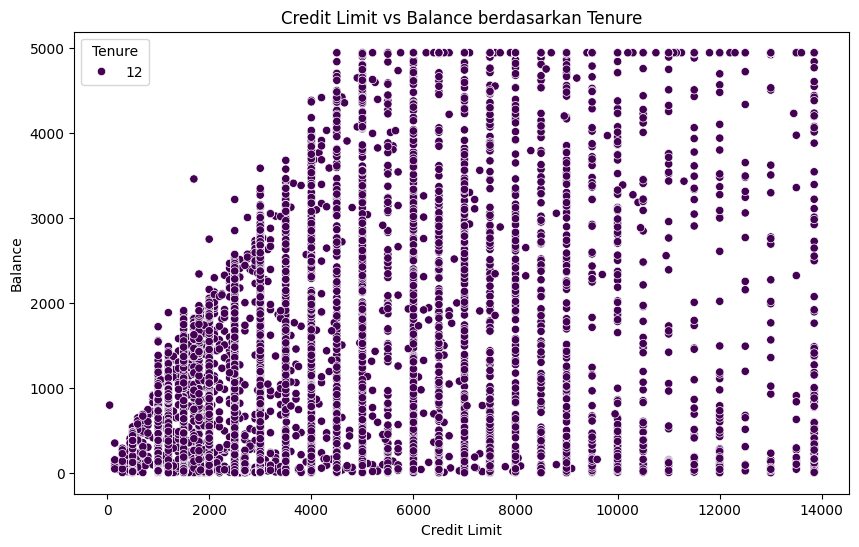

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_limit', y='balance', hue='tenure',palette='viridis', data=df)
plt.title('Credit Limit vs Balance berdasarkan Tenure')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend(title='Tenure')
plt.show()


Gambar scatter plot menunjukkan bahwa semakin besar nilai variabel maka sebaran/residual variansnya juga semakin besar hingga membentuk bentuk kerucut. Selain itu, seperti yang disebutkan sebelumnya, sebagian besar nasabah kartu kredit lebih memilih tenor 12 bulan.

# F. PRE PROCESSING 

In [24]:
# normalisasi data 
X = pd.DataFrame(StandardScaler().fit_transform(df))


## Menggunakan Metode PCA 


PCA (Principal Component Analysis) adalah teknik reduksi dimensi yang digunakan untuk mengurangi kompleksitas data dengan memproyeksikan data dari ruang dimensi yang lebih tinggi ke ruang dimensi yang lebih rendah. Tujuan utamanya adalah untuk mengurangi jumlah fitur (variabel) dalam dataset sambil mempertahankan informasi yang paling penting atau varian yang paling besar.

Dalam PCA, komponen utama yang merupakan kombinasi linear dari fitur-fitur asli diidentifikasi. Komponen-komponen ini diurutkan berdasarkan jumlah varian yang dijelaskan. PCA memungkinkan kita untuk menggambarkan variasi dalam dataset menggunakan jumlah komponen yang lebih sedikit, yang dapat membantu dalam visualisasi data, menghilangkan noise, dan mempersiapkan data untuk analisis lebih lanjut, seperti pembuatan model atau tugas machine learning. Salah satu kegunaan utama PCA adalah untuk menghilangkan korelasi antar fitur dan mengidentifikasi pola tersembunyi dalam data dengan mengurangi dimensi.

In [25]:
# ubah dataset ke array
X = np.asarray(X)

# menggunakan metode PCA
pca = PCA(n_components=2) 
X = pca.fit_transform(X)

In [26]:

pca.explained_variance_ratio_

array([0.33363329, 0.25099008])

# G. PENDEFINISIAN MODEL

### K-means
 merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster. Algoritma ini dapat menerima data tanpa ada label kategori. K-Means Clustering Algoritma juga merupakan metode non-hierarchy. Metode Clustering Algoritma adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain. Cluster Sampling adalah teknik pengambilan sampel di mana unit-unit populasi dipilih secara acak dari kelompok yang sudah ada yang disebut ‘cluster, nah Clustering atau klasterisasi adalah salah satu masalah yang menggunakan teknik unsupervised learning.

## H. PELATIHAN MODEL

In [27]:
#  mengevaluasi nilai optimal dari jumlah klaster
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

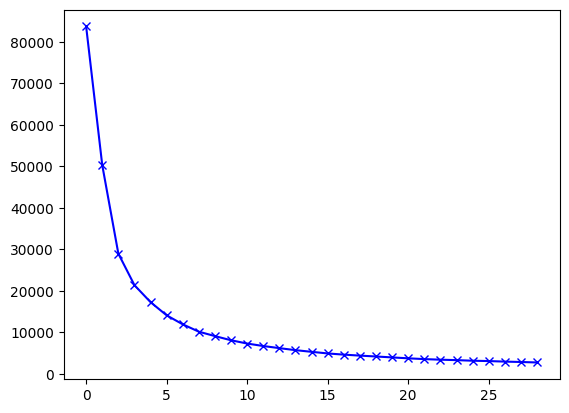

In [28]:
# melihat plot hasil 
plt.plot(cost, 'bx-')

## I. EVALUASI MODEL

In [29]:
# memilih cluster 6 untuk membuat model 
kmean= KMeans(n_clusters=5,random_state=2023)
kmean_model = kmean.fit(X)
labels=kmean.labels_

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
# melihat cluster dari dataset 
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head(10)

balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182    95.4000            0.0000   
1  3202.467416           0.909091     0.0000            0.0000   
2  2495.148862           1.000000   773.1700          773.1700   
3  1666.670542           0.722223  1499.0000         1443.5125   
4   817.714335           1.000000    16.0000           16.0000   
5  1809.828751           1.000000  1333.2800            0.0000   
6   627.260806           1.000000  2715.8725         1443.5125   
7  1823.652743           1.000000   436.2000            0.0000   
8  1014.926473           1.000000   861.4900          661.4900   
9   152.225975           0.722223  1281.6000         1281.6000   

   installments_purchases  cash_advance  purchases_frequency  \
0                95.40000      0.000000             0.166667   
1                 0.00000   2784.552848             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000    205.788017             0.083333   
4                 0.00000      0.000000             0.083333   
5              1171.59375      0.000000             0.666667   
6               688.38000      0.000000             1.000000   
7               436.20000      0.000000             1.000000   
8               200.00000      0.000000             0.333333   
9                 0.00000      0.000000             0.166667   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.750000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    0.750000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             41       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      payments  minimum_payments  prc_full_payment  tenure  cluster  
0   201.802084        139.509787          0.000000      12        4  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        4  
4   678.334763        244.791237          0.000000      12        4  
5  1400.057770       1904.229874          0.000000      12        0  
6  4177.921543        198.065894          0.357143      12        2  
7   679.065082        532.033990          0.000000      12        0  
8   688.278568        311.963409          0.000000      12        0  
9  1164.770591        100.302262          0.000000      12        0

## Visualisasi CLustering

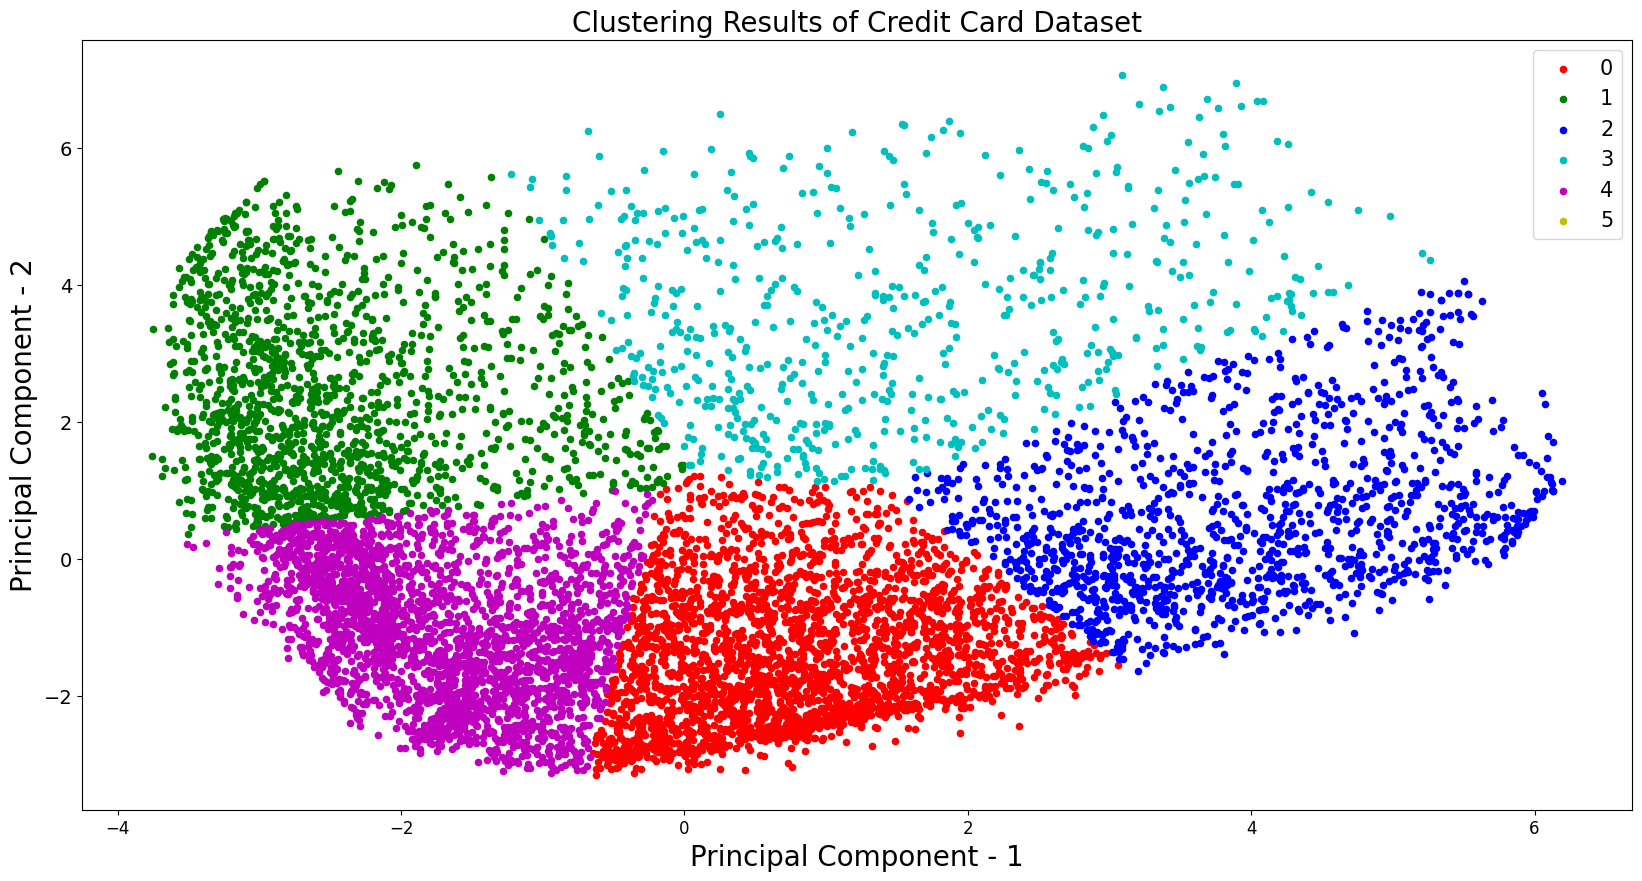

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  

# Membuat dataframe baru untuk hasil PCA
df_visual = pd.DataFrame(X_pca, columns=['p1', 'p2'])

# Memasukkan hasil clustering ke dalam dataframe df_visual
df_visual['cluster'] = labels  # Sesuaikan labels dengan hasil clustering Anda

# Visualisasi hasil clustering
plt.figure(figsize=(20, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Clustering Results of Credit Card Dataset", fontsize=20)
colors = ['r', 'g', 'b', 'c', 'm', 'y'] 
for cluster, color in zip(range(6), colors):
    indicesToKeep = df_visual['cluster'] == cluster
    plt.scatter(df_visual.loc[indicesToKeep, 'p1'],
                df_visual.loc[indicesToKeep, 'p2'],
                c=color, s=20)

plt.legend(range(6), prop={'size': 15})
plt.show()

Kesimpulan yang bisa diambil dari plot visualisasi hasil pengelompokan adalah sebagai berikut:

* Plot tersebut menunjukkan bahwa ada enam kelompok yang berbeda dari pemegang kartu kredit berdasarkan dua komponen utama yang mungkin merepresentasikan variabel perilaku tertentu, seperti saldo, pembayaran minimum, pembelian, dll.

* Plot tersebut juga menunjukkan bahwa tidak ada kelompok yang dominan atau jelas berbeda dari kelompok lain, yang berarti bahwa perilaku pemegang kartu kredit cukup bervariasi dan tidak mudah dikategorikan.

* Plot tersebut dapat digunakan untuk melakukan segmentasi pelanggan dan menargetkan kelompok tertentu dengan strategi pemasaran yang sesuai dengan kebutuhan dan preferensi mereka.

# K. PENGAMBILAN KESIMPULAN

1. Data yang digunakan untuk Analisis adalah data dari 9000 pengguna kartu kredit selama 6 bulan. data ini memiliki sedikit missing value dan data duplikat sehingga memerlukan sedikit penanganan untuk mengatasi pengurangan data untuk missing value dan data duplikatnya, dan juga mengatasi outliernya

2. Pada pre processing menggunakan teknik PCA untuk membantu mengurangi dimensi data dan mengidentifikasi pola utamanya.

3. Untuk metode clustering yang digunakan, menggunakan K-means. Untuk memilih cluster yang optimal saya menerapkan metode "Elbow Method".

4. Hasil yang didapat setelah clustering ada 6 cluster yang ada untuk mengelompokkan data credit card. 